## Import packages && configuration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#from sklearn.impute import KNNImputer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

 
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2)
sns.color_palette("rocket",as_cmap=True)

## Read Data

##### read credits data 

In [2]:
credits = pd.read_csv("datasets/tmdb_5000_credits.csv")

In [3]:
credits.shape

(4803, 4)

In [4]:
credits.sample(10)

movie_id                              title  \
1650     10350                     Wing Commander   
1295      8842                  Against the Ropes   
4177     62677                        Songcatcher   
1878      6116                        Spice World   
2603     12257                         Home Fries   
473         75                      Mars Attacks!   
2012     11632                        Vanity Fair   
3665     78814               We Have Your Husband   
2869     14799             For Your Consideration   
3171     11282  Harold & Kumar Go to White Castle   

                                                   cast  \
1650  [{"cast_id": 1, "character": "1st Lt. Christop...   
1295  [{"cast_id": 1, "character": "Jackie Kallen", ...   
4177  [{"cast_id": 2, "character": "Professor Lily P...   
1878  [{"cast_id": 13, "character": "Victoria", "cre...   
2603  [{"cast_id": 1, "character": "Sally Jackson", ...   
473   [{"cast_id": 6, "character": "President James ...   
2012  [{"cast_id": 22, "character": "Becky Sharp", "...   
3665  [{"cast_id": 3, "character": "Jayne Valseca", ...   
2869  [{"cast_id": 4, "character": "Marilyn Hack", "...   
3171  [{"cast_id": 1, "character": "Harold Lee", "cr...   

                                                   crew  
1650  [{"credit_id": "52fe435e9251416c7500db63", "de...  
1295  [{"credit_id": "555f44e69251417e51002c21", "de...  
4177  [{"credit_id": "560f433dc3a368681400eb47", "de...  
1878  [{"credit_id": "52fe443ec3a36847f808ab1d", "de...  
2603  [{"credit_id": "5672deccc3a3680719002f2a", "de...  
473   [{"credit_id": "52fe4214c3a36847f80022fd", "de...  
2012  [{"credit_id": "52fe446c9251416c75034365", "de...  
3665  [{"credit_id": "5970c931c3a36816080031da", "de...  
2869  [{"credit_id": "52fe461b9251416c7506d43b", "de...  
3171  [{"credit_id": "563474569251414ab70150db", "de...

In [5]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


 > rename moive_id column for joining

In [6]:
credits.rename(columns = {'movie_id':'id'}, inplace = True)

##### read movies data 

In [7]:
movies = pd.read_csv("datasets/tmdb_5000_movies.csv")

In [8]:
movies.shape

(4803, 20)

In [9]:
movies.sample(10)

budget                                             genres  \
112   155000000  [{"id": 10752, "name": "War"}, {"id": 36, "nam...   
4703     150000  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
3583   10000000  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
3589    5000000                      [{"id": 18, "name": "Drama"}]   
3368    7000000  [{"id": 10749, "name": "Romance"}, {"id": 35, ...   
2964          0  [{"id": 878, "name": "Science Fiction"}, {"id"...   
1147   41000000                     [{"id": 35, "name": "Comedy"}]   
122   150000000  [{"id": 12, "name": "Adventure"}, {"id": 28, "...   
2775   13000000  [{"id": 18, "name": "Drama"}, {"id": 28, "name...   
3671    5000000  [{"id": 35, "name": "Comedy"}, {"id": 14, "nam...   

                             homepage      id  \
112                               NaN    1966   
4703                              NaN   39141   
3583  http://www.ouridiotbrother.com/   59968   
3589                              NaN  284293   
3368                              NaN   14578   
2964                              NaN  190847   
1147                              NaN   73937   
122      http://www.x-menorigins.com/    2080   
2775                              NaN    9950   
3671       http://www.yogahosers.com/  290825   

                                               keywords original_language  \
112   [{"id": 347, "name": "aristotle"}, {"id": 1160...                en   
4703        [{"id": 10183, "name": "independent film"}]                en   
3583  [{"id": 1155, "name": "brother sister relation...                en   
3589  [{"id": 456, "name": "mother"}, {"id": 1992, "...                en   
3368  [{"id": 236, "name": "suicide"}, {"id": 572, "...                en   
2964  [{"id": 839, "name": "mars"}, {"id": 10568, "n...                en   
1147  [{"id": 720, "name": "helicopter"}, {"id": 818...                en   
122   [{"id": 417, "name": "corruption"}, {"id": 185...                en   
2775  [{"id": 3012, "name": "court case"}, {"id": 41...                en   
3671  [{"id": 1329, "name": "canada"}, {"id": 2652, ...                en   

                original_title  \
112                  Alexander   
4703                   Tadpole   
3583         Our Idiot Brother   
3589               Still Alice   
3368        Outside Providence   
2964     The Last Days on Mars   
1147              The Big Year   
122   X-Men Origins: Wolverine   
2775            Find Me Guilty   
3671               Yoga Hosers   

                                               overview  popularity  \
112   Alexander, the King of Macedonia, leads his le...   39.019229   
4703  Beautiful, sophisticated women are all over Os...    8.570328   
3583  Everybody has the sibling who is always just a...   15.688439   
3589  Alice Howland, happily married with three grow...   35.307577   
3368  In this coming-of-age comedy, Tim Dunphy is le...    2.627232   
2964  On the last day of the first manned mission to...   18.764453   
1147  Three fanatical bird-watchers spend an entire ...    9.419726   
122   After seeking to live a normal life, Logan set...    5.954334   
2775  Based on the true story of Jack DiNorscio, a m...   12.321302   
3671  Two teenage yoga enthusiasts team up with a le...    8.618793   

                                   production_companies  \
112   [{"name": "France 3 Cin\u00e9ma", "id": 591}, ...   
4703  [{"name": "IFC Productions", "id": 26468}, {"n...   
3583  [{"name": "The Weinstein Company", "id": 308},...   
3589  [{"name": "Killer Films", "id": 1422}, {"name"...   
3368  [{"name": "Miramax Films", "id": 14}, {"name":...   
2964  [{"name": "Qwerty Films", "id": 892}, {"name":...   
1147  [{"name": "Ingenious Media", "id": 290}, {"nam...   
122   [{"name": "Ingenious Film Partners", "id": 289...   
2775          [{"name": "Yari Film Group", "id": 2448}]   
3671  [{"name": "Invincible Pictures Corp.", "id": 1...   

                                   producti

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

##### joining data 

In [11]:
df = credits.merge(movies, how='inner',on='id')

In [12]:
df.shape

(4803, 23)

In [13]:
df.sample(10)

id          title_x  \
3020   39349       Sugar Hill   
4457     905    Pandora's Box   
4592    3059      Intolerance   
1371  271718       Trainwreck   
416     9339            Click   
870     8536      Superman II   
1770  303858    Money Monster   
4582    1435        Tarnation   
3226   20360  Namastey London   
718     8914    Deep Blue Sea   

                                                   cast  \
3020  [{"cast_id": 2, "character": "Romello Skuggs",...   
4457  [{"cast_id": 7, "character": "Lulu", "credit_i...   
4592  [{"cast_id": 23, "character": "The Woman Who R...   
1371  [{"cast_id": 4, "character": "Amy Townsend", "...   
416   [{"cast_id": 1, "character": "Michael Newman",...   
870   [{"cast_id": 3, "character": "Lex Luthor", "cr...   
1770  [{"cast_id": 6, "character": "Lee Gates", "cre...   
4582  [{"cast_id": 2, "character": "Herself", "credi...   
3226  [{"cast_id": 1, "character": "Arjun Ballu Sing...   
718   [{"cast_id": 14, "character": "Carter Blake", ...   

                                                   crew    budget  \
3020  [{"credit_id": "58fe42c992514163e303650e", "de...         0   
4457  [{"credit_id": "52fe428ac3a36847f8026e81", "de...         0   
4592  [{"credit_id": "577fe3e79251415db5000bf2", "de...    385907   
1371  [{"credit_id": "55aa7f0c92514172ef003b26", "de...  35000000   
416   [{"credit_id": "52fe44e9c3a36847f80b1757", "de...  82500000   
870   [{"credit_id": "52fe44aec3a36847f80a3f8d", "de...  54000000   
1770  [{"credit_id": "55693b229251416b04000b3e", "de...  27000000   
4582  [{"credit_id": "52fe42f7c3a36847f8030443", "de...       218   
3226  [{"credit_id": "52fe43e3c3a368484e00404f", "de...         0   
718   [{"credit_id": "52fe44c7c3a36847f80a9971", "de...  60000000   

                                                 genres  \
3020  [{"id": 18, "name": "Drama"}, {"id": 28, "name...   
4457  [{"id": 18, "name": "Drama"}, {"id": 53, "name...   
4592                      [{"id": 18, "name": "Drama"}]   
1371                     [{"id": 35, "name": "Comedy"}]   
416   [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
870   [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1770                   [{"id": 53, "name": "Thriller"}]   
4582  [{"id": 99, "name": "Documentary"}, {"id": 18,...   
3226  [{"id": 18, "name": "Drama"}, {"id": 10769, "n...   
718   [{"id": 28, "name": "Action"}, {"id": 878, "na...   

                                               homepage  \
3020  http://en.wikipedia.org/wiki/Sugar_Hill_(1994_...   
4457                                                NaN   
4592                                                NaN   
1371                                                NaN   
416                                                 NaN   
870                                                 NaN   
1770                                                NaN   
4582                                                NaN   
3226    http://www.erosentertainment.com/namasteylondon   
718                                                 NaN   

                                               keywords original_language  \
3020                                                 []                en   
4457  [{"id": 212, "name": "london england"}, {"id":...                de   
4592  [{"id": 279, "name": "usa"}, {"id": 2487, "nam...                en   
1371  [{"id": 567, "name": "alcohol"}, {"id": 2864, ...                en   
416   [{"id": 802, "name": "regret"}, {"id": 1022, "...                en   
870   [{"id": 83, "name": "saving the world"}, {"id"...                en   
1770  [{"id": 258, "name": "bomb"}, {"id": 1589, "na...                en   
4582  [{"id": 222, "name": "schizophrenia"}, {"id": ...                en   
3226                                                 []                en   
718   [{"id": 2988, "name": "shark attack"}, {"id": ...                en   

              original_title  \
3020              Sugar Hill   
4457  Die Büchse der Pan

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   title_x               4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4800 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue              

In [15]:
df.describe()

id        budget   popularity       revenue      runtime  \
count    4803.000000  4.803000e+03  4803.000000  4.803000e+03  4801.000000   
mean    57165.484281  2.904504e+07    21.492301  8.226064e+07   106.875859   
std     88694.614033  4.072239e+07    31.816650  1.628571e+08    22.611935   
min         5.000000  0.000000e+00     0.000000  0.000000e+00     0.000000   
25%      9014.500000  7.900000e+05     4.668070  0.000000e+00    94.000000   
50%     14629.000000  1.500000e+07    12.921594  1.917000e+07   103.000000   
75%     58610.500000  4.000000e+07    28.313505  9.291719e+07   118.000000   
max    459488.000000  3.800000e+08   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800000    737.000000  
max       10.000000  13752.000000

In [16]:
df.columns

Index(['id', 'title_x', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title_y', 'vote_average', 'vote_count'],
      dtype='object')

In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

id                         0
title_x                    0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_y                    0
vote_average               0
vote_count                 0
dtype: int64

## Data Exploration

### EDA
* drop (id) column 
* rename (title_x) to (title)
* change (cast) type to list
* handle [] in (cast)
* change (crew) type to list
* handle [] in (crew)
* deal with zeros as na (budget)
* change (genres) type to list
* handle [] in (genres)
* deal with outliers (budget)
* drop (homepage) column
* change (keywords) type to list 
* handle [] in (keywords)
* change (original_language) type to category 
* drop (original_title)
* deal with na in (overview)
* change (production_companies) type to list
* handle [] in (production_companies)
* change (production_countries) type to list
* handle [] in (production_countries)
* deal with na in (release_date)
* change (release_date) type from str to datetime
* deal with zeros in (revenue)
* million problem (revenue , budget)
* drop (revenue) after creating (profit) column 
* deal with outliers in (revenue)
* deal with zeros in (runtime)
* deal with na in (runtime)
* change (spoken_languages) type to list 
* handle [] in (spoken_languages)
* filter df by ( status == 'Released') 
* then drop column (status)
* drop (tagline)
* drop (title_y)
* rename (vote_average) to (imdb_rate)
* rename (vote_count) to (imdb_users_vote_count)
* filter df by (profit > 0)

### Feature Engineering 
* create new column (title_length) from (title)
* create new column (overview_length) from (overview)
* create new columns (cast_total_number) from  (cast)
* create new columns (crew_total_number) from  (crew)
* create new columns (release_date_year , release_date_month , release_date_day) from ( release_date )
* create new column (runtime_category) from (runtime)
* create new column (keywords_count) from (keywords)
* create new columns (spoken_languages_count,production_countries_count,production_companies_count,genres_count,keywords_count) from (spoken_languages,production_countries,production_companies,genres,keywords)

> title_x

In [19]:
df['title_x']

0                                                  Avatar
1                Pirates of the Caribbean: At World's End
2                                                 Spectre
3                                   The Dark Knight Rises
4                                             John Carter
5                                            Spider-Man 3
6                                                 Tangled
7                                 Avengers: Age of Ultron
8                  Harry Potter and the Half-Blood Prince
9                      Batman v Superman: Dawn of Justice
10                                       Superman Returns
11                                      Quantum of Solace
12             Pirates of the Caribbean: Dead Man's Chest
13                                        The Lone Ranger
14                                           Man of Steel
15               The Chronicles of Narnia: Prince Caspian
16                                           The Avengers
17            

> cast

In [20]:
df['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

> crew

In [21]:
df['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

> budget

In [22]:
df['budget'].describe()

count    4.803000e+03
mean     2.904504e+07
std      4.072239e+07
min      0.000000e+00
25%      7.900000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [23]:
df['budget'].value_counts()

0            1037
20000000      144
30000000      128
25000000      126
40000000      123
15000000      120
35000000      102
10000000      101
50000000      101
60000000       86
5000000        84
12000000       79
8000000        62
70000000       60
80000000       59
18000000       59
7000000        55
6000000        55
2000000        54
45000000       52
3000000        51
4000000        49
1000000        48
75000000       47
55000000       45
28000000       42
100000000      41
11000000       41
150000000      41
13000000       41
14000000       40
17000000       39
22000000       38
65000000       38
90000000       36
16000000       36
9000000        33
32000000       31
27000000       29
26000000       29
3500000        27
19000000       25
85000000       24
24000000       24
23000000       24
38000000       23
1500000        23
6500000        23
200000000      20
130000000      20
500000         19
2500000        18
21000000       18
120000000      18
110000000      18
37000000  

<AxesSubplot:xlabel='budget'>

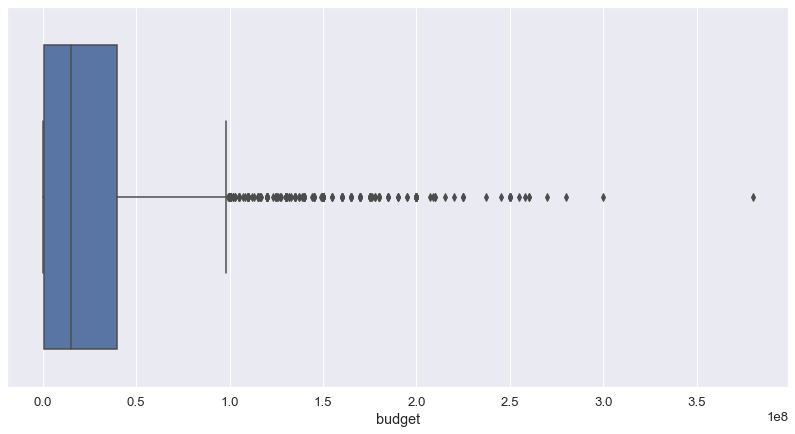

In [24]:
sns.boxplot(data=df,x='budget')

> genres

In [25]:
df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

> homepage 

In [26]:
( df['homepage'].isna().sum() / df.shape[0] ) * 100

64.35561107641058

> keywords

In [27]:
df['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

> original_language

In [28]:
df['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

> original_title

In [29]:
df[df['original_title'] != df['title_x']][['original_title','title_x']]

original_title  \
97                                               シン・ゴジラ   
215                        4: Rise of the Silver Surfer   
235                         Astérix aux Jeux Olympiques   
317                                               金陵十三釵   
474                                           Évolution   
488                              Arthur et les Minimoys   
492                  Don Gato: El inicio de la pandilla   
561                                         Deux frères   
678                                                天將雄師   
719                        Michael Jackson's This Is It   
786                                        西游记之孙悟空三打白骨精   
861                     Un long dimanche de fiançailles   
985                                         Joan of Arc   
1023                                        1947: Earth   
1028                                            Солярис   
1095                                            滿城盡帶黃金甲   
1136                                                 英雄   
1140                             Micmacs à tire-larigot   
1142                   Pourquoi j'ai pas mangé mon père   
1255                                       Lo imposible   
1260                Le fabuleux destin d'Amélie Poulain   
1284                                                投名狀   
1285                                              Nomad   
1287                                 Un monstre à Paris   
1298                                             Chi bi   
1304                                               一代宗師   
1341                                   Obitaemyy Ostrov   
1357                                                葉問3   
1460                             Le Hussard sur le toit   
1471                                            崖の上のポニョ   
1481                                 The House of Magic   
1518                                                 디워   
1669                                              Wu Ji   
1672                                               辛亥革命   
1673                                   Le petit Nicolas   
1676                                Konferenz der Tiere   
1680                                Савва. Сердце воина   
1709                                         キャプテンハーロック   
1730                                Le peuple migrateur   
1761                              The Neverending Story   
1784                                          EverAfter   
1802                       Highlander III: The Sorcerer   
1822                                                Viy   
1919                                    Un Plan parfait   
1945                                La migliore offerta   
1947             Sammy's avonturen: De geheime doorgang   
1948                               Les petits mouchoirs   
1950                La véritable histoire du Chat Botté   
1951                   Белка и Стрелка. Звёздные собаки   
1955                                             一個人的武林   
1987                                            ハウルの動く城   
2009                                  Coco avant Chanel   
2011                                              Chéri   
2013                                               十月圍城   
2052                                          Zwartboek   
2059                                            Molière   
2064                                            Metegol   
2184                                                 功夫   
2247                                              もののけ姫   
2254                                              黃石的孩子   
2262                                               長江七號   
2263            Les Visiteurs 2 : Les Couloirs du temps   
2268                                            三国之见龙卸甲   
2271                                          ராமானுஜன்   
2277                         Der Baader Meinhof Komplex   
2294                                           千と千尋の神隠し   
2295                                                 風暴   
2309                         

In [30]:
df[df['original_title'] != df['title_x']][['original_title','title_x']].shape

(261, 2)

In [31]:
# translated to English 

> overview

In [32]:
df['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [33]:
df['overview'].isna().sum()

3

> popularity

In [34]:
df['popularity']

0       150.437577
1       139.082615
2       107.376788
3       112.312950
4        43.926995
5       115.699814
6        48.681969
7       134.279229
8        98.885637
9       155.790452
10       57.925623
11      107.928811
12      145.847379
13       49.046956
14       99.398009
15       53.978602
16      144.448633
17      135.413856
18       52.035179
19      120.965743
20       89.866276
21       37.668301
22       94.370564
23       42.990906
24       61.226010
25      100.025899
26      198.372395
27       64.928382
28      418.708552
29       93.004993
30       35.149586
31       77.682080
32       78.530105
33        3.857526
34       89.186492
35       21.939663
36      116.840296
37       46.985445
38       89.270217
39       73.795050
40       49.986590
41       51.872839
42       59.995418
43       71.862892
44      102.322217
45       81.834855
46      118.078691
47       78.291018
48       43.349855
49       61.196071
50       62.169881
51       56.523205
52       28.

In [35]:
df['popularity'].describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

> production_companies

In [36]:
df['production_companies'][0]

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

> release_date

In [37]:
df['release_date'].dtypes

dtype('O')

In [38]:
df['release_date'].isna().sum()

1

In [39]:
df['release_date'].value_counts()

2006-01-01    10
2002-01-01     8
2013-07-18     7
1999-10-22     7
2014-12-25     7
2004-09-03     7
2005-09-16     6
2005-01-01     6
2011-09-16     6
2003-01-01     6
2011-09-30     6
2015-10-16     6
2007-01-01     6
2011-09-09     5
1998-12-25     5
2008-10-10     5
2001-09-07     5
2002-12-13     5
2008-01-01     5
2004-12-17     5
2015-10-02     5
2009-01-01     5
1999-10-08     5
2001-10-05     5
2009-09-11     5
2010-01-01     5
2008-10-03     5
2006-09-01     5
2000-09-08     5
2006-09-09     5
2011-02-11     5
2006-08-11     5
2014-04-16     5
2014-09-10     5
2005-05-13     5
2005-09-09     4
2014-10-31     4
2001-12-21     4
2009-01-09     4
2008-02-01     4
2012-04-27     4
2012-09-20     4
2004-04-30     4
1998-10-16     4
1999-08-06     4
2010-09-10     4
2008-09-26     4
2003-01-17     4
2015-11-12     4
2015-11-20     4
2009-09-13     4
2005-04-22     4
2003-09-05     4
2013-07-11     4
2002-09-20     4
2013-02-07     4
2007-08-03     4
2011-08-26     4
2004-10-22    

> revenue

In [40]:
df['revenue'].describe()

count    4.803000e+03
mean     8.226064e+07
std      1.628571e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.917000e+07
75%      9.291719e+07
max      2.787965e+09
Name: revenue, dtype: float64

<AxesSubplot:xlabel='revenue'>

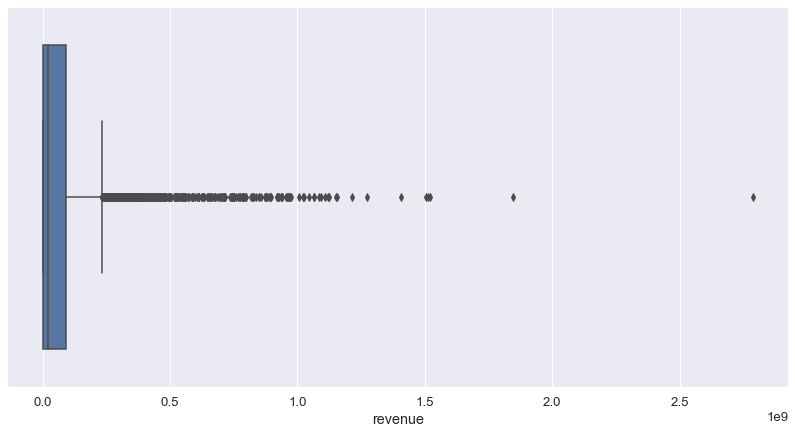

In [41]:
sns.boxplot(data=df,x='revenue')

> runtime

In [42]:
df['runtime'].describe()

count    4801.000000
mean      106.875859
std        22.611935
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [43]:
df[df['runtime'] < 30][['title_x' , 'runtime']]

title_x  runtime
1011                                    The Tooth Fairy      0.0
3112                            Blood Done Sign My Name      0.0
3669                               Should've Been Romeo      0.0
3809                                How to Fall in Love      0.0
3953                                         Fort McCoy      0.0
3992                                          Sardaarji      0.0
4068                                          Sharkskin      0.0
4118                             Hum To Mohabbat Karega      0.0
4205                                           N-Secure      0.0
4210                                Dil Jo Bhi Kahey...      0.0
4241                                          The Salon      0.0
4313                                         Below Zero      0.0
4318                                    Bleeding Hearts      0.0
4322                                 Sex With Strangers      0.0
4328                              The Vatican Exorcisms      0.0
4405                                  Karachi se Lahore      0.0
4435                          The Horror Network Vol. 1      0.0
4458                                Harrison Montgomery      0.0
4466                                             Vessel     14.0
4502                                      Water & Power      0.0
4504                            Light from the Darkroom      0.0
4553                         America Is Still the Place      0.0
4558                     Alleluia! The Devil's Carnival      0.0
4564                           Straight Out of Brooklyn      0.0
4566                                       Diamond Ruff      0.0
4569                                     Mutual Friends      0.0
4571  Rise of the Entrepreneur: The Search for a Bet...      0.0
4581                               Gory Gory Hallelujah      0.0
4584                       Love in the Time of Monsters      0.0
4611                                       The Big Swap      0.0
4620                               Fighting Tommy Riley      0.0
4633                                        Death Calls      0.0
4657                                          UnDivided      0.0
4658                                         The Frozen      0.0
4662                                     Little Big Top      0.0
4709                          A Charlie Brown Christmas     25.0
4729                               Dude Where's My Dog?      0.0

In [44]:
df[df['runtime'] < 30][['title_x' , 'runtime']].shape

(37, 2)

> spoken_languages

In [45]:
df['spoken_languages'][0]

'[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]'

> status

In [46]:
df['status'].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [47]:
# we will only deal with Released status 

> tagline

In [48]:
df['tagline']

0                             Enter the World of Pandora.
1          At the end of the world, the adventure begins.
2                                   A Plan No One Escapes
3                                         The Legend Ends
4                    Lost in our world, found in another.
5                                      The battle within.
6                They're taking adventure to new lengths.
7                                     A New Age Has Come.
8                                   Dark Secrets Revealed
9                                      Justice or revenge
10                                                    NaN
11          For love, for hate, for justice, for revenge.
12                                          Jack is back!
13                                Never Take Off the Mask
14                   You will believe that a man can fly.
15                                   Hope has a new face.
16                                Some assembly required.
17            

> vote_average && vote_count

In [49]:
df['vote_average'].describe()

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

In [50]:
df['vote_count'].describe()

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64

In [51]:
df[df['vote_average'] ==0] [['title_x','vote_average','vote_count']]

title_x  vote_average  \
1464                                Black Water Transit           0.0   
3669                               Should've Been Romeo           0.0   
3670                                    Running Forever           0.0   
3852                                         The Secret           0.0   
3855                                     Time to Choose           0.0   
3960                                       The Deported           0.0   
3967                                Four Single Fathers           0.0   
4051                                             8 Days           0.0   
4065                                         Mi America           0.0   
4068                                          Sharkskin           0.0   
4118                             Hum To Mohabbat Karega           0.0   
4140                        To Be Frank, Sinatra at 100           0.0   
4186                        A Beginner's Guide to Snuff           0.0   
4210                                Dil Jo Bhi Kahey...           0.0   
4266                      House at the End of the Drive           0.0   
4269                      The Ballad of Gregorio Cortez           0.0   
4275                             Queen of the Mountains           0.0   
4293                                       The Algerian           0.0   
4305                          Down & Out With The Dolls           0.0   
4307                               Certifiably Jonathan           0.0   
4309                              The Blade of Don Juan           0.0   
4400                                           Sparkler           0.0   
4444                                               Elza           0.0   
4458                                Harrison Montgomery           0.0   
4462                                 The Young Unknowns           0.0   
4486                                   Naturally Native           0.0   
4487                                         Hav Plenty           0.0   
4491                      The Hadza:  Last of the First           0.0   
4500                                Carousel of Revenge           0.0   
4504                            Light from the Darkroom           0.0   
4508                           The Harvest (La Cosecha)           0.0   
4550                       The Outrageous Sophie Tucker           0.0   
4553                         America Is Still the Place           0.0   
4556                                   El Rey de Najayo           0.0   
4559                           The Sound and the Shadow           0.0   
4569                                     Mutual Friends           0.0   
4589                                             Fabled           0.0   
4611                                       The Big Swap           0.0   
4625                                   Midnight Cabaret           0.0   
4626                                   Anderson's Cross           0.0   
4633                                        Death Calls           0.0   
4638                           Amidst the Devil's Wings           0.0   
4653                                               Rust           0.0   
4657                                          UnDivided           0.0   
4660                                    Give Me Shelter           0.0   
4665                                   Western Religion           0.0   
4674                   Short Cut to Nirvana: Kumbh Mela           0.0   
4684                                     American Beast           0.0   
4692                                Theresa Is a Mother           0.0   
4694                             Archaeology of a Woman           0.0   
4698                                     Butterfly Girl           0.0   
4699                                  The World Is Mine           0.0   
4708                                     Heroes of Dirt           0.0   
4710                          Antarctic Edge: 70° South           0.0   
4714                           An

In [52]:
df[df['vote_average'] ==0] [['title_x','vote_average','vote_count']].shape

(63, 3)

## Data Pre-processing 

> filter df by status == 'Released'

In [53]:
df = df[df['status'] == 'Released']

In [54]:
df.shape

(4795, 23)

> rename columns 

In [55]:
df.rename(columns = {'title_x':'title' ,'vote_average':'imdb_rate' , 'vote_count':'imdb_users_vote_count'}, inplace = True)

> 1- handle empty list [] in  (cast,crew,genres,keywords,production_companies,production_countries,spoken_languages)

> 2- change data type to list for (cast,crew,genres,keywords,production_companies,production_countries,spoken_languages)

In [56]:
def change_to_list(col):
    if col not in ['production_companies','production_countries','spoken_languages']:
        df[col] = df[col].replace('[]',np.nan)
        print(col,'==>',df[col].isna().sum())
#         df.dropna(subset = [col], inplace=True)
        df[col] = df[col].fillna(df[col].mode()[0])
    else: 
        df[col] = df[col].replace('[]',np.nan)
        print(col , 'mode ==> ' , df[col].mode())
        df[col] = df[col].fillna(df[col].mode()[0])
    df[col] = df[col].apply(lambda x: eval(x))
    
## call function 
for col in ['cast','crew','genres','keywords','production_companies','production_countries','spoken_languages']:
    change_to_list(col)

cast ==> 41
crew ==> 26
genres ==> 28
keywords ==> 409
production_companies mode ==>  0    [{"name": "Paramount Pictures", "id": 4}]
dtype: object
production_countries mode ==>  0    [{"iso_3166_1": "US", "name": "United States o...
dtype: object
spoken_languages mode ==>  0    [{"iso_639_1": "en", "name": "English"}]
dtype: object


In [57]:
df.shape

(4795, 23)

In [58]:
df['production_companies'].mode()

0    [{'name': 'Paramount Pictures', 'id': 4}]
dtype: object

> drop columns 

In [59]:
df.drop(['id','homepage','tagline','original_title','status','title_y'],axis=1,inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4795 entries, 0 to 4802
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  4795 non-null   object 
 1   cast                   4795 non-null   object 
 2   crew                   4795 non-null   object 
 3   budget                 4795 non-null   int64  
 4   genres                 4795 non-null   object 
 5   keywords               4795 non-null   object 
 6   original_language      4795 non-null   object 
 7   overview               4792 non-null   object 
 8   popularity             4795 non-null   float64
 9   production_companies   4795 non-null   object 
 10  production_countries   4795 non-null   object 
 11  release_date           4794 non-null   object 
 12  revenue                4795 non-null   int64  
 13  runtime                4793 non-null   float64
 14  spoken_languages       4795 non-null   object 
 15  imdb

> original_language 

In [61]:
df['original_language'] = df['original_language'].astype('category')

> release_date

In [62]:
df[df['release_date'].isna()] 

title  \
4553  America Is Still the Place   

                                                   cast  \
4553  [{'cast_id': 0, 'character': '', 'credit_id': ...   

                                                   crew  budget  \
4553  [{'credit_id': '52fe420dc3a36847f800012d', 'de...       0   

                             genres  \
4553  [{'id': 18, 'name': 'Drama'}]   

                                         keywords original_language  \
4553  [{'id': 10183, 'name': 'independent film'}]                en   

                                               overview  popularity  \
4553  1971 post civil rights San Francisco seemed li...         0.0   

                           production_companies  \
4553  [{'name': 'Paramount Pictures', 'id': 4}]   

                                   production_countries release_date  revenue  \
4553  [{'iso_3166_1': 'US', 'name': 'United States o...          NaN        0   

      runtime                          spoken_languages  imdb_rate  \
4553      0.0  [{'iso_639_1': 'en', 'name': 'English'}]        0.0   

      imdb_users_vote_count  
4553                      0

In [63]:
df.dropna(subset = ['release_date'], inplace=True)

In [64]:
df.shape

(4794, 17)

In [65]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [66]:
df[['release_date']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4794 entries, 0 to 4802
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_date  4794 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 74.9 KB


> overview

In [67]:
df['overview'] = df['overview'].fillna(' ')

> runtime

In [68]:
df['runtime'] = df['runtime'].replace(0,np.nan)

In [69]:
df['runtime'].isna().sum()

35

In [70]:
df['runtime'].fillna(df['runtime'].median(),inplace=True)

In [71]:
df['runtime'].isna().sum()

0

In [72]:
df['runtime'].value_counts()

90.0     163
100.0    149
104.0    144
98.0     140
97.0     132
95.0     123
99.0     119
94.0     116
96.0     115
101.0    114
93.0     112
92.0     107
105.0    106
91.0     106
106.0    105
102.0    100
110.0    100
107.0     99
103.0     99
108.0     94
88.0      90
120.0     85
89.0      85
109.0     82
113.0     79
87.0      77
111.0     74
114.0     73
112.0     72
115.0     72
118.0     68
86.0      68
116.0     67
85.0      66
117.0     64
124.0     62
119.0     60
84.0      59
121.0     59
125.0     52
123.0     51
122.0     47
127.0     46
83.0      46
130.0     45
126.0     34
128.0     33
129.0     33
80.0      32
82.0      31
135.0     29
132.0     29
81.0      28
134.0     28
136.0     27
131.0     27
133.0     25
139.0     25
140.0     19
144.0     17
138.0     17
78.0      17
137.0     17
141.0     16
145.0     15
143.0     14
154.0     12
142.0     10
157.0      9
79.0       9
149.0      9
75.0       9
146.0      9
77.0       8
170.0      8
76.0       8
150.0      8

In [73]:
df.shape

(4794, 17)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4794 entries, 0 to 4802
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  4794 non-null   object        
 1   cast                   4794 non-null   object        
 2   crew                   4794 non-null   object        
 3   budget                 4794 non-null   int64         
 4   genres                 4794 non-null   object        
 5   keywords               4794 non-null   object        
 6   original_language      4794 non-null   category      
 7   overview               4794 non-null   object        
 8   popularity             4794 non-null   float64       
 9   production_companies   4794 non-null   object        
 10  production_countries   4794 non-null   object        
 11  release_date           4794 non-null   datetime64[ns]
 12  revenue                4794 non-null   int64         
 13  run

## Feature Engineering 

> create new column (title_length) from (title)  & create new column (overview_length) from (overview) 

In [75]:
# get list of stop words 
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [76]:
def get_count(col):
    if col == 'overview': #remove stop words  
        df[col+"_length"] = df[col].apply(lambda x : len(list(i for i in x.split(" ") if i.lower() not in stop_words) ))
    else: 
        df[col+"_length"] = df[col].apply(lambda x : len(x.split(" ")))
    df.drop(col,axis=1,inplace=True)
for col in ['overview','title']:
    get_count(col)

> create new column (runtime_category) from (runtime) 

In [77]:
df['runtime_category'] = df['runtime'].apply(lambda x: 'short' if x > 0 and x < 50 else 'normal' if x >=50 and x <= 120 else 'semi-long' if x >120 and x < 180 else 'long')
df['runtime_category'] = df['runtime_category'].astype('category')

> handle budget & revenue 

In [78]:
df[df['budget'] == 0][['budget','revenue']]

budget    revenue
265        0          0
321        0  104907746
359        0  233755553
406        0          0
409        0   37823676
453        0          0
463        0          0
474        0          0
475        0   43312294
489        0   19406406
542        0    5802422
584        0          0
601        0          0
691        0  253625427
721        0          0
735        0          0
745        0          0
757        0          0
766        0  141702264
847        0   33472850
881        0          0
882        0    5761917
897        0   47231070
915        0          0
948        0          0
1007       0   68929150
1011       0          0
1016       0          0
1023       0     528972
1028       0          0
1032       0          0
1066       0          0
1069       0          0
1080       0          0
1126       0   73100172
1142       0          0
1202       0          0
1206       0   51854875
1225       0          0
1229       0          0
1248       0          0
1250       0          0
1261       0          0
1268       0          0
1269       0          0
1274       0          0
1282       0          0
1288       0          0
1292       0   69485490
1301       0          0
1321       0          0
1349       0          0
1350       0          0
1355       0          0
1360       0          0
1380       0          0
1392       0          0
1397       0          0
1402       0          0
1442       0          0
1453       0          0
1462       0   25147786
1464       0          0
1497       0   60328000
1511       0          0
1522       0          0
1527       0  106269971
1569       0          0
1575       0          0
1580       0          0
1595       0   42647449
1600       0          0
1619       0          0
1623       0   31911598
1624       0          0
1626       0   60896147
1637       0          0
1651       0          0
1664       0   18074539
1665       0          0
1666       0          0
1667       0    3102550
1669       0          0
1673       0          0
1676       0          0
1687       0          0
1691       0          0
1692       0          0
1705       0          0
1729       0          0
1755       0          0
1763       0          0
1768       0          0
1772       0    4488529
1775       0          0
1776       0          0
1793       0          0
1805       0          0
1821       0  181466833
1824       0          0
1843       0          0
1854       0          0
1857       0          0
1865       0          0
1880       0          0
1899       0          0
1900       0          0
1908       0          0
1910       0   14334401
1919       0          0
1922       0   25000000
1930       0          0
1933       0          0
1937       0          0
1942       0   34153101
1947       0          0
1949       0          0
1950       0          0
1973       0          0
1985       0          0
2001       0          0
2004       0          0
2005       0          0
2009       0          0
2035       0    9930095
2038       0          0
2047       0          0
2048       0          0
2051       0          0
2055       0          0
2059       0          0
2062       0          0
2073       0   37000000
2081       0          0
2104       0          0
2110       0          0
2127       0          0
2138       0          0
2146       0          0
2156       0          0
2161       0          0
2164       0          0
2182       0          0
2183       0   17519169
2190       0          0
2201       0          0
2206       0          0
2209       0          0
2210       0          0
2211       0          0
2220       0    9109322
2221       0   12382362
2226       0          0
2231       0    6575282
2232       0          0
2236       0          0
2241       0          0
2242       0          0
2248       0          0
2249       0          0
2255       0          0
2256       0          0
2259       0          0
2260       0          0
2262       0   47301471
2263       0          

In [79]:
def handle_zeros_revenue_budget(col):
    df[col] = df[col].replace(0,np.nan)
    df[col] = df[col].apply(lambda x: x/1000000 if x >= 1000 else x )
    df[col] = df[col].fillna(df.groupby('runtime_category')[col].transform('median'))

for col in ['revenue','budget']:
    handle_zeros_revenue_budget(col)

In [80]:
df[df['runtime_category'] == 'large'] [['runtime_category','runtime','revenue','budget']]
# avatar revenue 3 billion now 

Empty DataFrame
Columns: [runtime_category, runtime, revenue, budget]
Index: []

> create new columns (movie_age,release_date_year , release_date_month , release_date_day) from ( release_date )

In [81]:
df = df.assign(
    #movie_age = lambda x: datetime.now().year - x['release_date'].dt.year, 
    release_date_day= lambda x: x['release_date'].dt.day_name() , 
    release_date_month = lambda x: x['release_date'].dt.month_name() , 
    release_date_year = lambda x: x['release_date'].dt.year
    )
df.drop(['release_date'],axis=1,inplace=True)

In [82]:
df['release_date_year']

0       2009
1       2007
2       2015
3       2012
4       2012
5       2007
6       2010
7       2015
8       2009
9       2016
10      2006
11      2008
12      2006
13      2013
14      2013
15      2008
16      2012
17      2011
18      2012
19      2014
20      2012
21      2010
22      2013
23      2007
24      2005
25      1997
26      2016
27      2012
28      2015
29      2012
30      2004
31      2013
32      2010
33      2006
34      2013
35      2009
36      2014
37      2013
38      2014
39      2010
40      2011
41      2011
42      2010
43      2009
44      2015
45      2013
46      2014
47      2013
48      2013
49      2013
50      2010
51      2013
52      2011
53      2008
54      2015
55      2012
56      2016
57      2008
58      2007
59      2009
60      2009
61      2015
62      2016
63      2005
64      2016
65      2008
66      2009
67      2009
68      2008
69      2011
70      1999
71      2008
72      2016
73      2007
74      2014
75      1995
76      2009

> create new columns 
(spoken_languages_count,production_countries_count,production_companies_count,genres_count,keywords_count) 
from (spoken_languages,production_countries,production_companies,genres,keywords) 

In [83]:
def extract_names(col):
    df[col] = df[col].apply(lambda y : [ x['name'] for x in y])
    df[col+'_count'] = df[col].apply(lambda y : len(y))
    columns = set([ i for x in df[col] for i in x ])        
    print(col , '(columns no==>)',len(columns))
## call function 
for col in ['keywords','spoken_languages','genres','production_companies','production_countries']: 
    extract_names(col)
    df.dropna(subset=[col],inplace=True)

keywords (columns no==>) 9806
spoken_languages (columns no==>) 62
genres (columns no==>) 20
production_companies (columns no==>) 5015
production_countries (columns no==>) 88


> create new columns (cast_total_number , cast_gender_female , cast_gender_male) from  (cast)

In [84]:
def func(num,cat):
    if cat == 'short' and num < 5 : 
        return num
    elif cat == 'normal' and num < 10 : 
        return np.nan 
    elif cat =='semi-long' and num < 20 : 
        return np.nan 
    elif cat == 'long' and num < 25 : 
        return np.nan 
    else : return num 
def get_data(col):
    df[col+'_total_number'] = df[col].apply(lambda x: len(x))
    df[col+'_total_number'] = df.apply(lambda x: func(x[col+'_total_number'], x['runtime_category']), axis=1)
    df[col+'_total_number'] = df[col+'_total_number'].fillna(df.groupby('runtime_category')[col+'_total_number'].transform('median'))
    df.drop([col],axis=1,inplace=True)
    
#     df[col+'_gender_female'] = df[col].apply(lambda x: len([i for i in x if i['gender'] == 1 ]))
#     df[col+'_gender_male'] = df[col].apply(lambda x: len([i for i in x if i['gender'] == 0  or  i['gender'] == 2]))
get_data('cast')
# df.drop(['cast'],axis=1,inplace=True)

In [85]:
df.groupby('runtime_category').agg({
    'cast_total_number':['min','max','median','median']
}).reset_index()

runtime_category cast_total_number                     
                                 min    max median median
0             long              26.0  140.0   45.5   45.5
1           normal              10.0  183.0   18.0   18.0
2        semi-long              20.0  224.0   34.0   34.0
3            short               2.0   10.0    6.5    6.5

In [86]:
df['cast_total_number'].unique()

array([ 83. ,  34. , 158. ,  27. , 143. ,  13. ,  72. ,  49. , 152. ,
        32. ,  33. ,  60. ,  21. , 115. ,  35. ,  18. ,  42. ,  57. ,
        29. , 136. , 100. ,  46. ,  28. ,  24. ,  76. , 107. ,  37. ,
        41. , 159. ,  65. ,  23. ,  47. ,  45. ,  15. ,  52. ,  22. ,
        98. ,  31. ,  43. ,  39. ,  38. ,  19. ,  66. ,  95. , 134. ,
        16. ,  87. , 128. ,  40. ,  30. ,  36. ,  82. ,  70. ,  10. ,
        67. ,  14. ,  80. ,  51. , 101. , 113. ,  63. ,  56. ,  74. ,
        25. ,  75. ,  12. ,  20. , 168. ,  71. ,  17. ,  26. ,  68. ,
        11. ,  58. ,  54. , 208. ,  53. , 172. ,  61. ,  79. , 110. ,
       140. ,  88. ,  78. ,  44. ,  91. ,  59. ,  55. , 183. , 108. ,
       141. ,  48. ,  62. ,  69. ,  73. , 224. , 105. ,  77. ,  50. ,
       114. ,  45.5,  84. ,  81. , 117. ,  92. , 123. ,  64. , 125. ,
       124. ,  86. ,  99. , 106. ,  89. ,  85. , 122. , 103. , 104. ,
       137. ,  93. ,  96. ,  94. ,  90. ,   8. ,   2. ,   5. , 133. ,
       213. , 131. ,

In [87]:
df['cast_total_number'].value_counts(normalize=True)

18.0     0.185857
34.0     0.086775
15.0     0.062995
16.0     0.042136
10.0     0.038381
11.0     0.036713
14.0     0.035044
20.0     0.034001
12.0     0.033584
13.0     0.032958
17.0     0.030246
19.0     0.028369
21.0     0.027117
22.0     0.024406
23.0     0.021694
24.0     0.020025
25.0     0.016479
28.0     0.014602
26.0     0.013767
27.0     0.013350
29.0     0.012933
33.0     0.011264
31.0     0.010221
32.0     0.008970
30.0     0.007927
38.0     0.007509
42.0     0.006466
36.0     0.005841
37.0     0.005632
35.0     0.005423
45.0     0.005006
47.0     0.004798
41.0     0.004798
40.0     0.004798
49.0     0.004172
44.0     0.003963
39.0     0.003755
51.0     0.003755
46.0     0.003546
45.5     0.003546
43.0     0.003338
48.0     0.003338
56.0     0.003129
55.0     0.002920
52.0     0.002920
53.0     0.002503
50.0     0.002295
59.0     0.002295
54.0     0.002295
65.0     0.002086
58.0     0.001877
62.0     0.001877
67.0     0.001877
74.0     0.001877
71.0     0.001669
61.0     0

> create new columns (crew_total_number, crew_gender_female , crew_gender_male) from (crew)

In [88]:
get_data('crew')

In [89]:
#df['crew'][0]
# i tried to get the number of employees in each department, but it created 12 additional columns so i commented on the following code 

# columns = list(set([ i['department'].lower() for x in df['crew'] for i in x ])  )
# for col in columns : 
#     df['crew_'+col+'_total_number'] = df['crew'].apply(lambda x: len([i for i in x if i['department'].lower() == col]))
# df.drop(['crew'],axis=1,inplace=True)

> create profit from revenue & budget

In [90]:
df['profit'] = df['revenue'] - df['budget']
df.drop(['revenue'],axis=1,inplace=True)
df['profit']

0       2550.965087
1        661.000000
2        635.674609
3        834.939099
4         24.139100
5        632.871626
6        331.794936
7       1125.403694
8        683.959197
9        623.260194
10       121.081192
11       386.090727
12       865.659812
13      -165.710090
14       437.845518
15       194.651413
16      1299.557910
17       665.713802
18       399.026776
19       706.019788
20       537.215857
21       110.669540
22       708.400000
23       192.234864
24       343.000000
25      1645.034188
26       903.304495
27        94.025485
28      1363.528810
29       908.561013
30       583.766341
31      1015.439994
32       825.491110
33       249.359555
34       543.559607
35       686.297228
36       881.405097
37       291.868548
38       505.717432
39       230.062763
40       359.852396
41        19.851172
42       866.969703
43       171.353001
44      1316.249360
45       331.865000
46       497.862775
47       277.365246
48         2.687603
49       246.040419


#### i will use only a data frame that contains a positive value of profit

In [91]:
df = df[df['profit'] > 0]

In [92]:
# i tried to work with data frame when the  release_date_year after 1999 but i found the result  
# df = df[df['release_date_year'] > 1999]
# df.info()

In [93]:
df.sample(2)

budget                                genres  \
1472    34.0                      [Drama, Romance]   
2573    20.0  [Action, Adventure, Drama, Thriller]   

                                               keywords original_language  \
1472  [based on novel, art student, cowboy, injury, ...                en   
2573             [prisoner, fight, liberation, shelter]                en   

      popularity                            production_companies  \
1472   41.946523  [Fox 2000 Pictures, Temple Hill Entertainment]   
2573   11.689337                             [Columbia Pictures]   

            production_countries  runtime spoken_languages  imdb_rate  \
1472  [United States of America]    128.0        [English]        7.3   
2573  [United States of America]     94.0        [English]        5.5   

      imdb_users_vote_count  overview_length  title_length runtime_category  \
1472                   1064               15             3        semi-long   
2573                    119               21             3           normal   

     release_date_day release_date_month  release_date_year  keywords_count  \
1472         Thursday              April               2015               7   
2573           Friday            January               1993               4   

      spoken_languages_count  genres_count  production_companies_count  \
1472                       1             2                           2   
2573                       1             4                           1   

      production_countries_count  cast_total_number  crew_total_number  \
1472                           1               34.0               28.0   
2573                           1               11.0               11.0   

         profit  
1472  29.013281  
2573  22.277365

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3865 entries, 0 to 4802
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   budget                      3865 non-null   float64 
 1   genres                      3865 non-null   object  
 2   keywords                    3865 non-null   object  
 3   original_language           3865 non-null   category
 4   popularity                  3865 non-null   float64 
 5   production_companies        3865 non-null   object  
 6   production_countries        3865 non-null   object  
 7   runtime                     3865 non-null   float64 
 8   spoken_languages            3865 non-null   object  
 9   imdb_rate                   3865 non-null   float64 
 10  imdb_users_vote_count       3865 non-null   int64   
 11  overview_length             3865 non-null   int64   
 12  title_length                3865 non-null   int64   
 13  runtime_category  

In [95]:
### handle missing data (revenue,budget) by using knn i tried this solution but it didn't work fine with me 

In [96]:
# df['revenue'] = df['revenue'].replace(0,np.nan)

In [97]:
# df['revenue'].isna().sum()

In [98]:
# df['budget'] = df['budget'].replace(0,np.nan)

In [99]:
# df['budget'].isna().sum()

In [100]:
# df.loc[973,['revenue','budget']]

In [101]:
# df.select_dtypes(exclude=['object','category','datetime']).columns

In [102]:
# Before_imputation= df[['spoken_languages_count','genres_count', 'production_companies_count', 'cast_total_number',  'crew_total_number','runtime','revenue','budget','movie_age']]

In [103]:
#Before_imputation[Before_imputation['revenue'].isna()]

In [104]:
# imputer = KNNImputer(n_neighbors=5)
# After_imputation = imputer.fit_transform(Before_imputation)

In [105]:
# After_imputation = pd.DataFrame(After_imputation ,  columns = Before_imputation.columns)

In [106]:
# After_imputation[After_imputation['revenue'].isna()]

In [107]:
# After_imputation[After_imputation['budget'].isna()]

In [108]:
# df[['revenue','budget']] = After_imputation[['revenue','budget']]
# After_imputation.loc[973,['revenue','budget']]

In [109]:
#remaining_cols = [ i for i in df.columns if i not in After_imputation.columns]

In [110]:
#df = df[remaining_cols]

In [111]:
#df = pd.concat([df, After_imputation], axis=1)

In [112]:
#df.info()

In [113]:
#df.sample()

In [114]:
# After_imputation[['revenue','budget']]

In [115]:
# df[df['revenue'].isna()][['revenue','budget']]

In [116]:
# df.loc[895,['revenue','budget']]

In [117]:
# After_imputation.loc[895,['revenue','budget']]

In [118]:
# df[['revenue','budget']] = After_imputation[['revenue','budget']]

In [119]:
# df.loc[895,['revenue','budget']]

## Data Analysis 

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3865 entries, 0 to 4802
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   budget                      3865 non-null   float64 
 1   genres                      3865 non-null   object  
 2   keywords                    3865 non-null   object  
 3   original_language           3865 non-null   category
 4   popularity                  3865 non-null   float64 
 5   production_companies        3865 non-null   object  
 6   production_countries        3865 non-null   object  
 7   runtime                     3865 non-null   float64 
 8   spoken_languages            3865 non-null   object  
 9   imdb_rate                   3865 non-null   float64 
 10  imdb_users_vote_count       3865 non-null   int64   
 11  overview_length             3865 non-null   int64   
 12  title_length                3865 non-null   int64   
 13  runtime_category  

> release_date_year

In [121]:
df['release_date_year'].max()

2017

In [122]:
df['release_date_year'].min()

1916

<AxesSubplot:xlabel='release_date_year', ylabel='Count'>

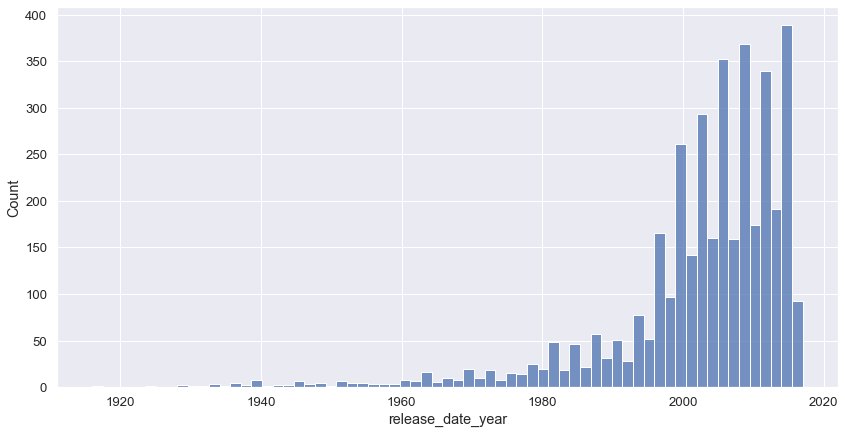

In [123]:
sns.histplot(data=df,x='release_date_year')
# the data provider wants to study the behaviour of data over 100 years 

> runtime

<AxesSubplot:xlabel='runtime', ylabel='Density'>

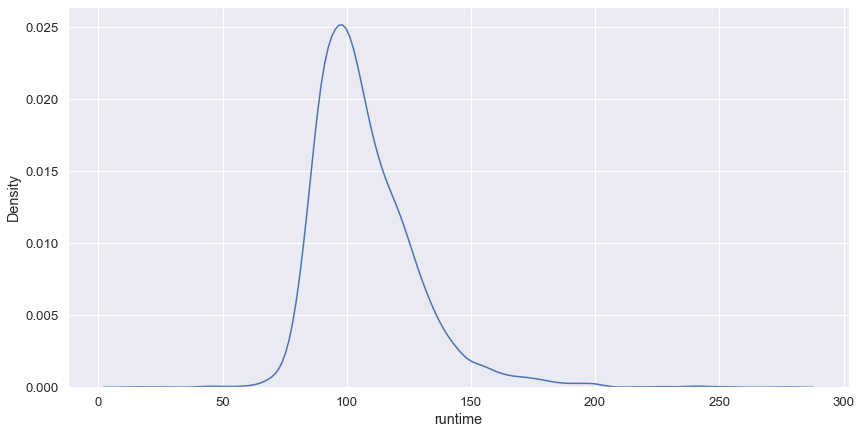

In [206]:
sns.kdeplot(data=df,x='runtime')

> release date month 

<AxesSubplot:xlabel='release_date_month', ylabel='count'>

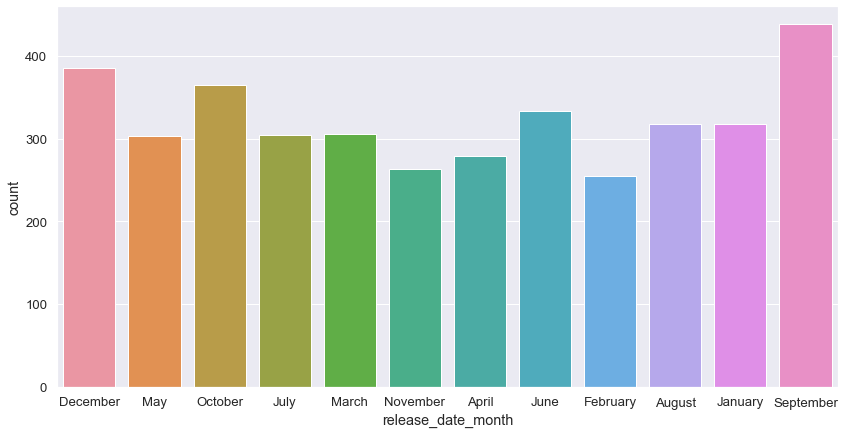

In [124]:
sns.countplot(data = df , x = 'release_date_month')

> release date day 

<AxesSubplot:xlabel='release_date_day', ylabel='count'>

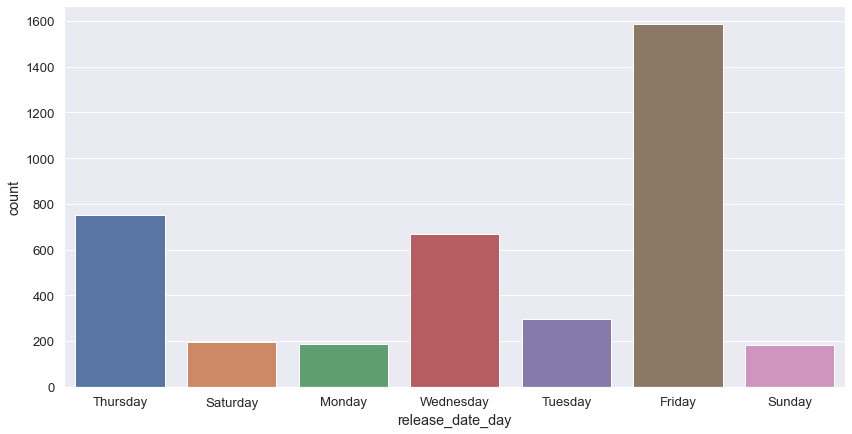

In [125]:
sns.countplot(data = df , x = 'release_date_day')

> runtime_category

<AxesSubplot:xlabel='runtime_category', ylabel='count'>

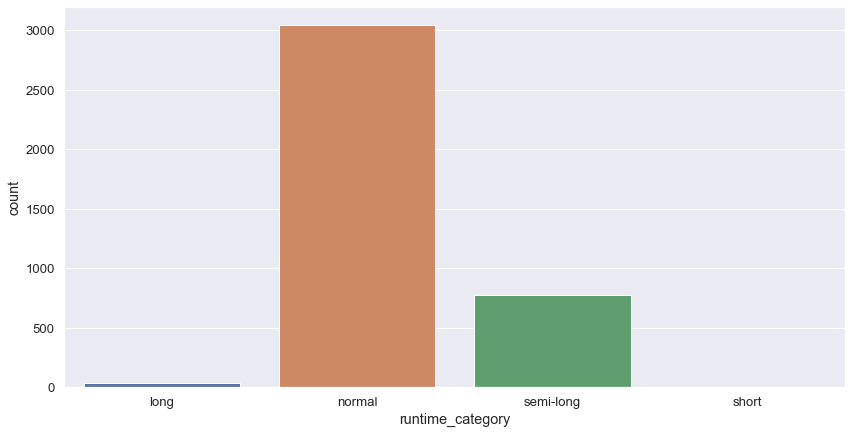

In [126]:
sns.countplot(data=df,x='runtime_category')

In [127]:
df['runtime_category'].value_counts()

normal       3047
semi-long     776
long           37
short           5
Name: runtime_category, dtype: int64

In [128]:
df[df['runtime'] < 50][['runtime']]

runtime
3354     46.0
3471     42.0
4466     14.0
4709     25.0
4756     47.0

> title_length 

<AxesSubplot:xlabel='title_length', ylabel='Count'>

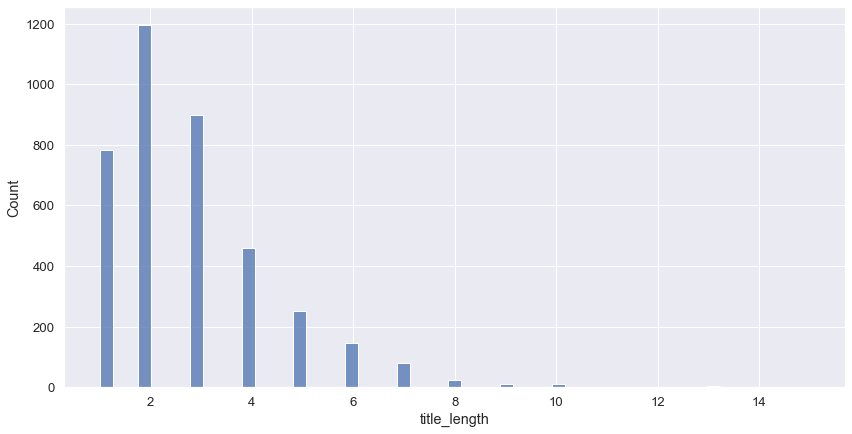

In [129]:
sns.histplot(data=df , x='title_length')

In [130]:
df['title_length'].value_counts()

2     1196
3      897
1      782
4      460
5      251
6      145
7       79
8       25
10      11
9       11
13       3
12       2
11       2
15       1
Name: title_length, dtype: int64

> overview_length

<AxesSubplot:xlabel='overview_length', ylabel='Count'>

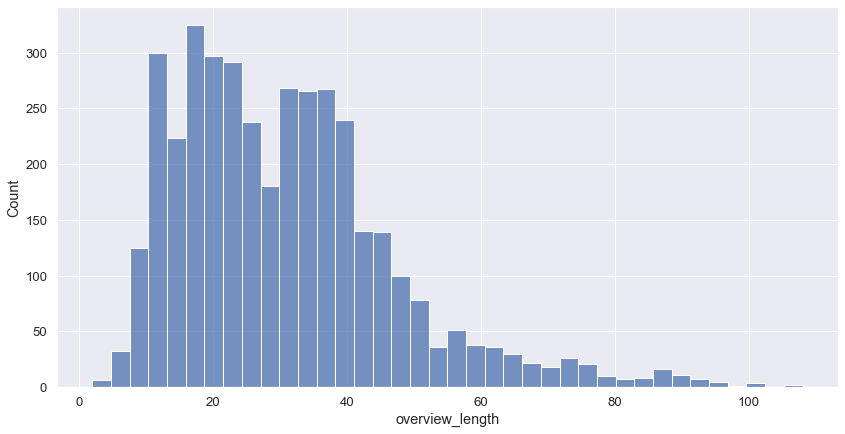

In [131]:
sns.histplot(data=df , x='overview_length')

> keywords_count

<AxesSubplot:xlabel='keywords_count', ylabel='Density'>

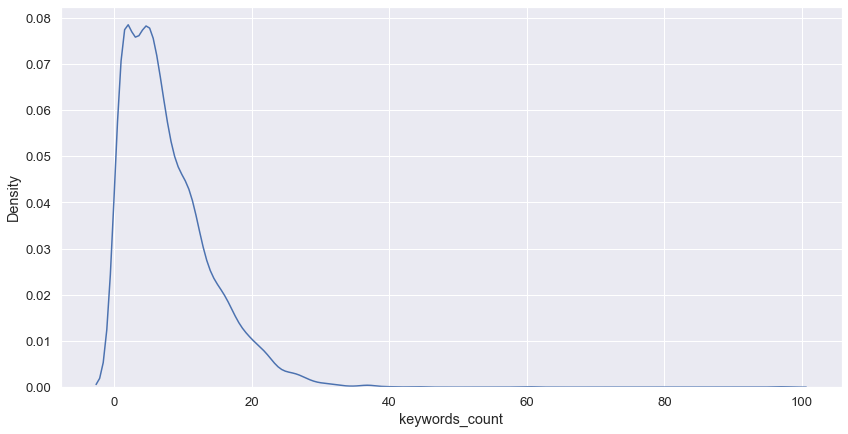

In [132]:
sns.kdeplot(data=df , x='keywords_count')

In [133]:
df['keywords_count'].value_counts()

1     589
5     348
4     291
6     284
3     279
7     255
2     212
8     198
11    186
9     177
10    172
12    142
13    104
14     91
15     85
16     81
17     71
19     50
18     45
20     39
22     35
21     32
23     20
26     13
27     12
25     12
24     12
29      6
31      5
28      5
37      4
32      2
33      1
60      1
44      1
40      1
36      1
34      1
30      1
97      1
Name: keywords_count, dtype: int64

In [134]:
df['keywords_count'].max()

97

> original_language

<AxesSubplot:xlabel='original_language', ylabel='count'>

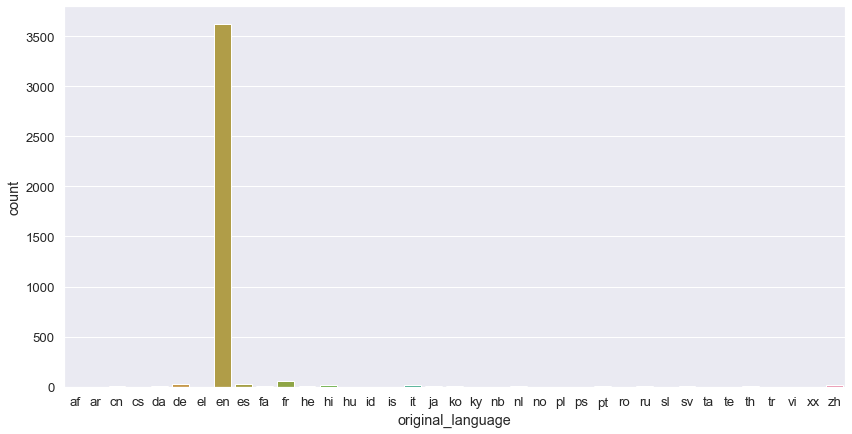

In [135]:
sns.countplot(data=df , x='original_language')

> spoken_languages_count

<AxesSubplot:xlabel='spoken_languages_count', ylabel='Count'>

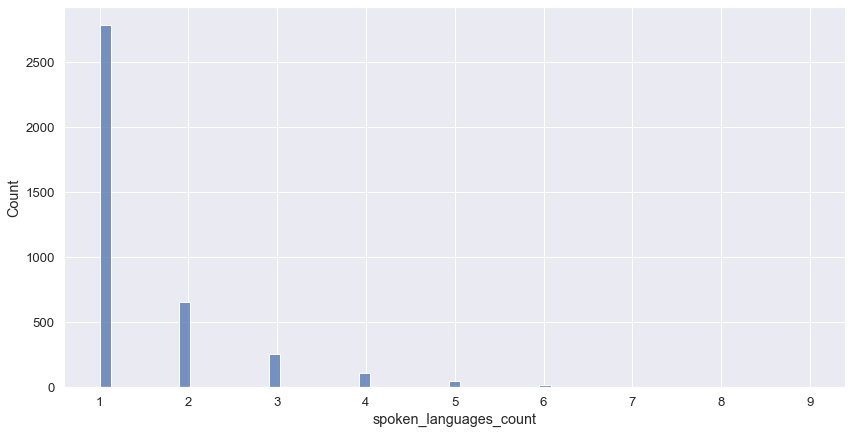

In [136]:
sns.histplot(data=df , x='spoken_languages_count')

In [137]:
df['spoken_languages_count'].value_counts()

1    2783
2     651
3     253
4     111
5      45
6      16
7       4
8       1
9       1
Name: spoken_languages_count, dtype: int64

In [138]:
df['spoken_languages'].astype('str').value_counts()

['English']                                                                                     2628
['English', 'Español']                                                                           100
['English', 'Français']                                                                           86
['Français']                                                                                      41
['English', 'Deutsch']                                                                            41
['English', 'Italiano']                                                                           40
['English', 'Pусский']                                                                            39
['Español', 'English']                                                                            37
['Español']                                                                                       20
['Français', 'English']                                                                    

> genres_count

<AxesSubplot:xlabel='genres_count', ylabel='Count'>

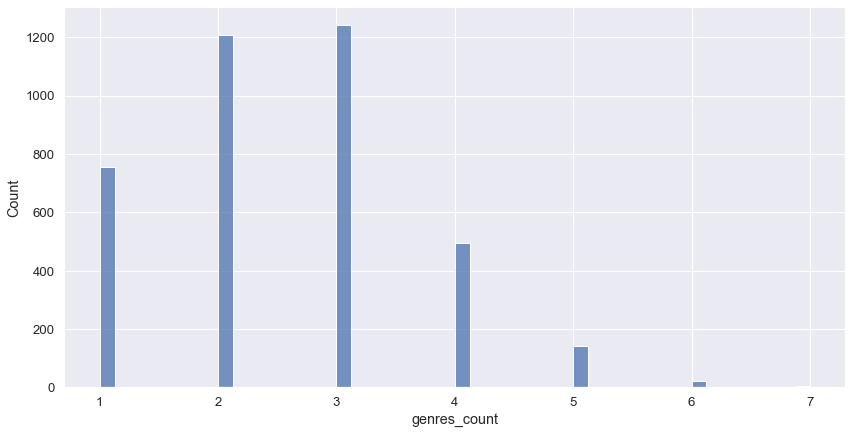

In [139]:
sns.histplot(data=df , x='genres_count')

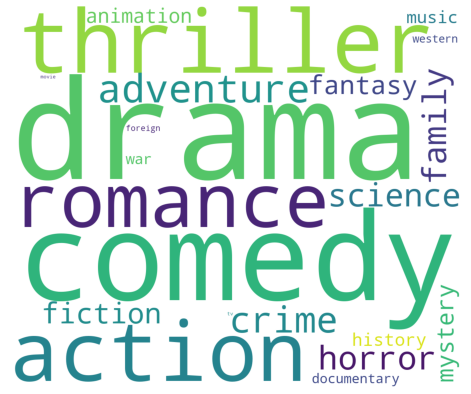

In [140]:
list_of_sl = list(df['genres'].apply(lambda x: x).values)
text = ' '.join([i.lower() for j in list_of_sl for i in j])
text
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [141]:
df['genres'].astype('str').value_counts()

['Drama']                                                                                 311
['Comedy']                                                                                235
['Drama', 'Romance']                                                                      132
['Comedy', 'Romance']                                                                     124
['Comedy', 'Drama']                                                                       112
['Comedy', 'Drama', 'Romance']                                                             93
['Horror', 'Thriller']                                                                     75
['Horror']                                                                                 61
['Documentary']                                                                            56
['Drama', 'Thriller']                                                                      44
['Crime', 'Drama', 'Thriller']                              

> production_companies_count

<AxesSubplot:xlabel='production_companies_count', ylabel='Count'>

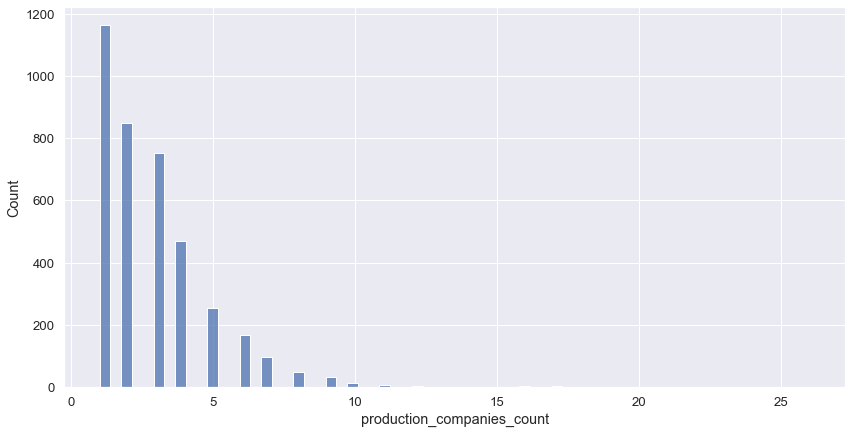

In [142]:
sns.histplot(data=df,x='production_companies_count')

In [143]:
df[df['production_companies_count']> 20 ] 

budget                        genres  \
2799    12.8         [Drama, Crime, Music]   
3197     6.5  [Crime, Drama, History, War]   

                                               keywords original_language  \
2799  [individual, dancing, usa, robbery, factory wo...                en   
3197  [assassin, copenhagen, resistance, repayment, ...                da   

      popularity                               production_companies  \
2799   22.022228  [Fine Line Features, Zentropa Entertainments, ...   
3197    7.028946  [Det Danske Filminstitut, Wüste Filmproduktion...   

                                   production_countries  runtime  \
2799  [Argentina, Denmark, Finland, France, Germany,...    140.0   
3197  [Czech Republic, Denmark, Finland, France, Ger...    130.0   

      spoken_languages  imdb_rate  imdb_users_vote_count  overview_length  \
2799         [English]        7.6                    377               39   
3197  [Dansk, Deutsch]        6.8                     68               68   

      title_length runtime_category release_date_day release_date_month  \
2799             4        semi-long        Wednesday                May   
3197             3        semi-long          Tuesday              March   

      release_date_year  keywords_count  spoken_languages_count  genres_count  \
2799               2000              29                       1             3   
3197               2008              12                       2             4   

      production_companies_count  production_countries_count  \
2799                          26                          12   
3197                          25                           7   

      cast_total_number  crew_total_number     profit  
2799               29.0               62.0  27.231879  
3197               44.0               60.0  89.389482

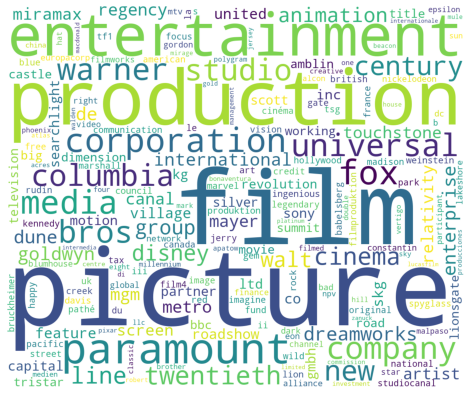

In [144]:
list_of_sl = list(df['production_companies'].apply(lambda x: x).values)
text = ' '.join([i.lower() for j in list_of_sl for i in j])
text
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [145]:
df['production_companies'].astype('str').value_counts()

['Paramount Pictures']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       362
['Universal Pictures']                                                                                                                                                                                                                                                                                                                                                                                                                 

> production_countries_count

<AxesSubplot:xlabel='production_countries_count', ylabel='Count'>

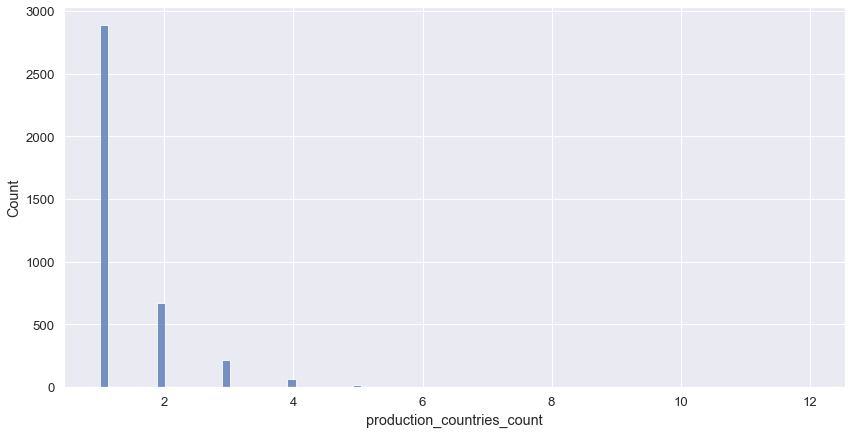

In [146]:
sns.histplot(data=df , x='production_countries_count')

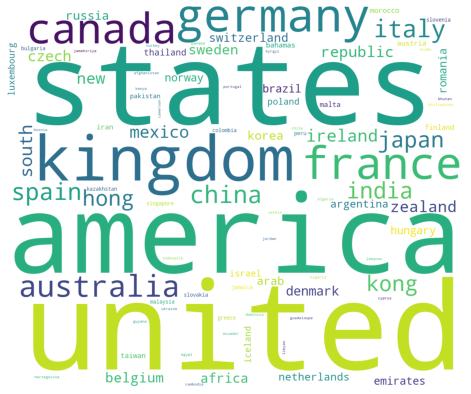

In [147]:
list_of_sl = list(df['production_countries'].apply(lambda x: x).values)
text = ' '.join([i.lower() for j in list_of_sl for i in j])
text
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

> cast_total_number

<AxesSubplot:xlabel='cast_total_number', ylabel='Count'>

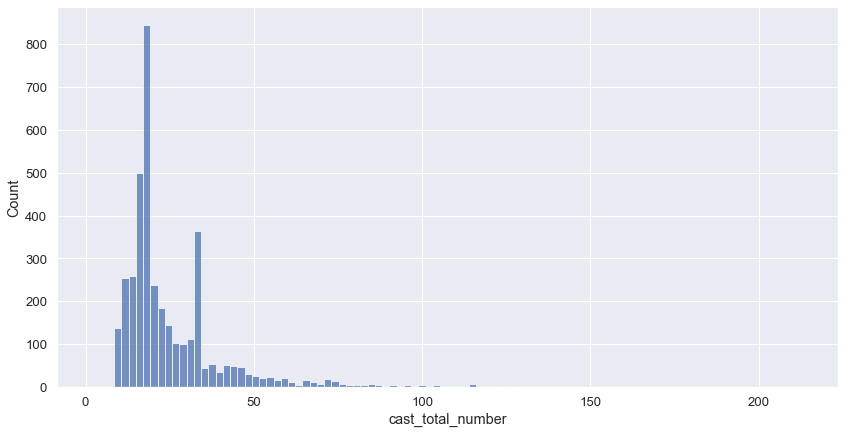

In [148]:
sns.histplot(data=df , x='cast_total_number')

In [149]:
df['cast_total_number'].value_counts()

18.0     730
34.0     321
15.0     228
16.0     162
11.0     140
10.0     139
14.0     133
20.0     128
13.0     126
19.0     115
12.0     115
21.0     111
17.0     110
22.0      93
23.0      91
24.0      81
25.0      63
26.0      53
28.0      52
27.0      50
29.0      49
33.0      44
31.0      43
32.0      37
30.0      33
38.0      31
42.0      29
35.0      23
37.0      23
36.0      22
41.0      22
45.0      21
47.0      20
40.0      19
49.0      18
51.0      17
39.0      16
44.0      16
46.0      14
45.5      13
43.0      13
48.0      12
55.0      12
53.0      11
56.0      11
54.0      11
59.0      10
50.0      10
52.0      10
65.0       9
74.0       9
66.0       8
71.0       8
67.0       8
62.0       7
69.0       6
60.0       6
61.0       6
75.0       6
57.0       6
72.0       6
87.0       5
58.0       5
76.0       5
115.0      4
73.0       4
68.0       4
84.0       4
63.0       4
85.0       3
81.0       3
100.0      3
114.0      3
79.0       3
80.0       3
83.0       3
92.0       3

> crew_total_number

<AxesSubplot:xlabel='crew_total_number', ylabel='Count'>

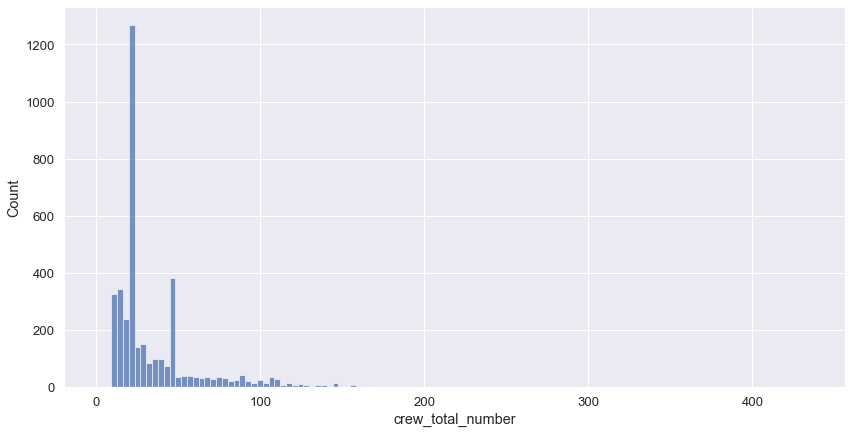

In [150]:
sns.histplot(data=df , x='crew_total_number')

In [151]:
df['crew_total_number'].value_counts()

21.0     1080
48.0      326
10.0      120
11.0      108
12.0       98
17.0       95
13.0       95
14.0       94
15.0       82
18.0       75
16.0       71
19.0       68
20.0       67
23.0       63
22.0       59
24.0       49
25.0       45
26.0       45
28.0       43
30.0       38
29.0       36
27.0       35
31.0       33
88.0       32
34.0       30
32.0       28
38.0       28
41.0       26
46.0       24
40.0       24
35.0       24
36.0       23
43.0       23
39.0       22
33.0       22
37.0       21
44.0       21
45.0       17
44.5       15
47.0       15
42.0       14
77.0       14
58.0       14
57.0       14
49.0       13
74.0       12
72.0       12
105.0      12
67.0       12
64.0       12
51.0       12
65.0       11
71.0       11
109.0      11
56.0       11
60.0       11
108.0      11
55.0       11
59.0       10
53.0       10
81.0       10
62.0       10
69.0       10
76.0       10
52.0       10
92.0       10
50.0       10
86.0        9
111.0       9
95.0        9
66.0        9
75.0  

> budget

<AxesSubplot:xlabel='budget', ylabel='Density'>

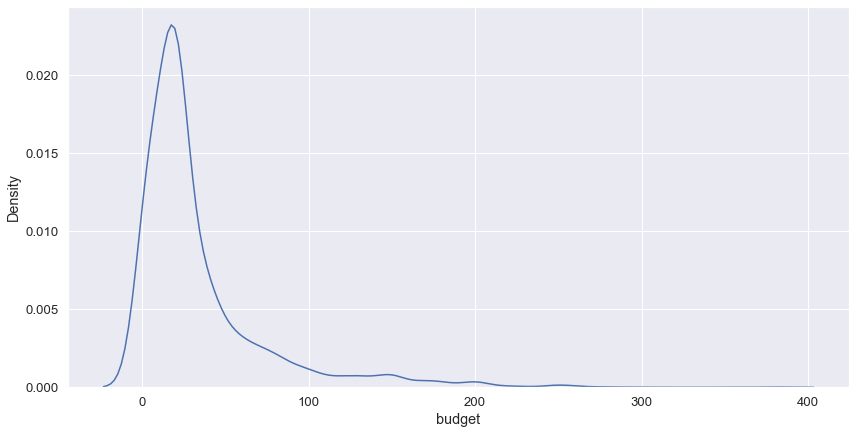

In [152]:
sns.kdeplot(data=df,x='budget')

In [153]:
df[df['budget'] < 0]

Empty DataFrame
Columns: [budget, genres, keywords, original_language, popularity, production_companies, production_countries, runtime, spoken_languages, imdb_rate, imdb_users_vote_count, overview_length, title_length, runtime_category, release_date_day, release_date_month, release_date_year, keywords_count, spoken_languages_count, genres_count, production_companies_count, production_countries_count, cast_total_number, crew_total_number, profit]
Index: []

> profit

<AxesSubplot:xlabel='profit', ylabel='Count'>

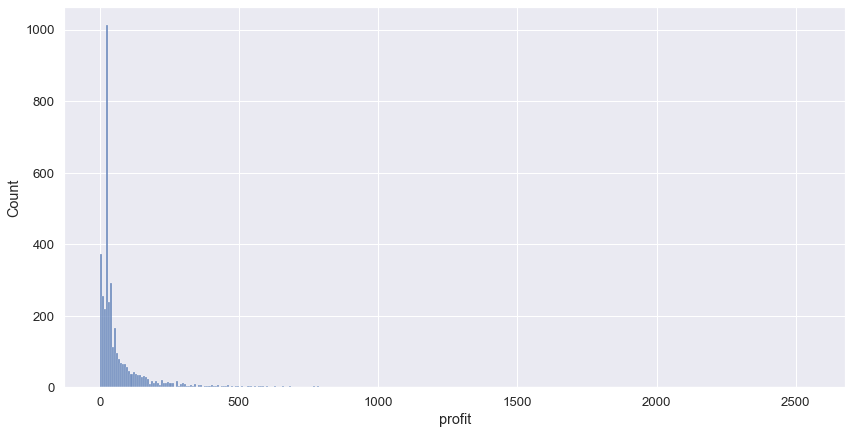

In [154]:
sns.histplot(data=df,x='profit')

In [155]:
df[df['profit'] < 0].shape

(0, 25)

> imdb_rate

<AxesSubplot:xlabel='imdb_rate', ylabel='Count'>

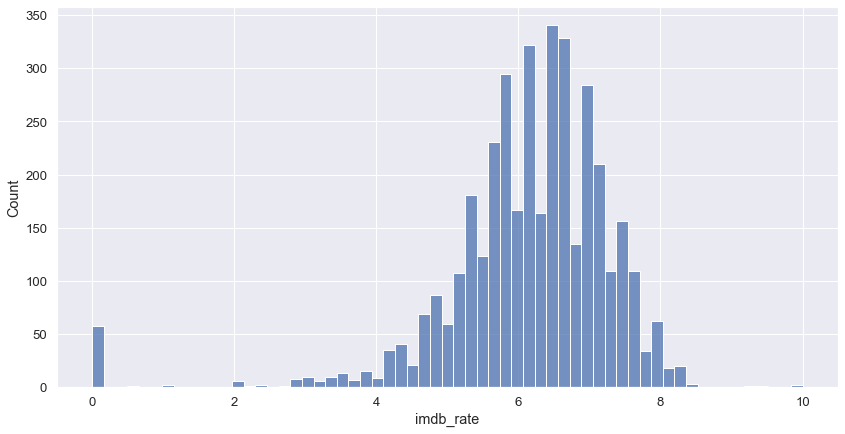

In [156]:
sns.histplot(data=df,x='imdb_rate')

> popularity

<AxesSubplot:xlabel='popularity', ylabel='Count'>

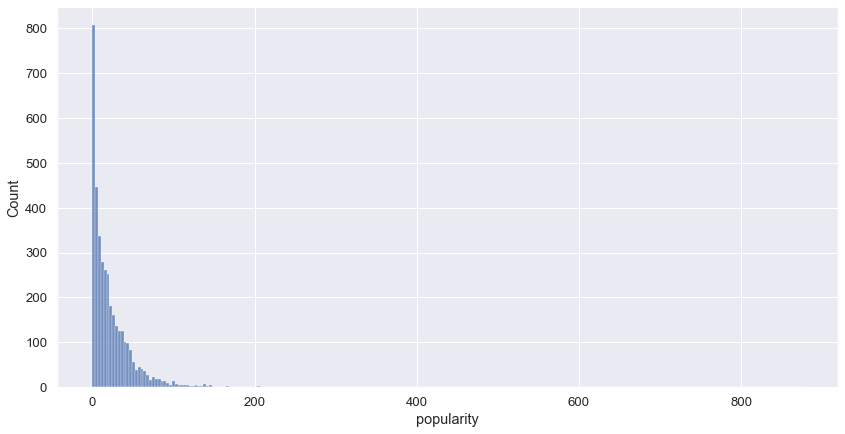

In [157]:
sns.histplot(data=df,x='popularity')

> imdb_users_vote_count

<AxesSubplot:xlabel='imdb_users_vote_count', ylabel='Count'>

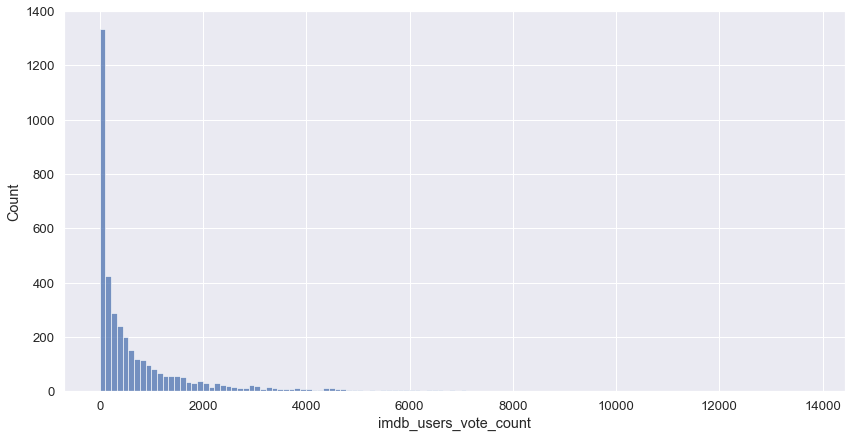

In [158]:
sns.histplot(data=df,x='imdb_users_vote_count')

In [159]:
# df[df['profit'] < 0][['title','revenue','budget','profit']]

### diagnostic analysis

> Over time , profit increases ?

<AxesSubplot:xlabel='release_date_year', ylabel='profit'>

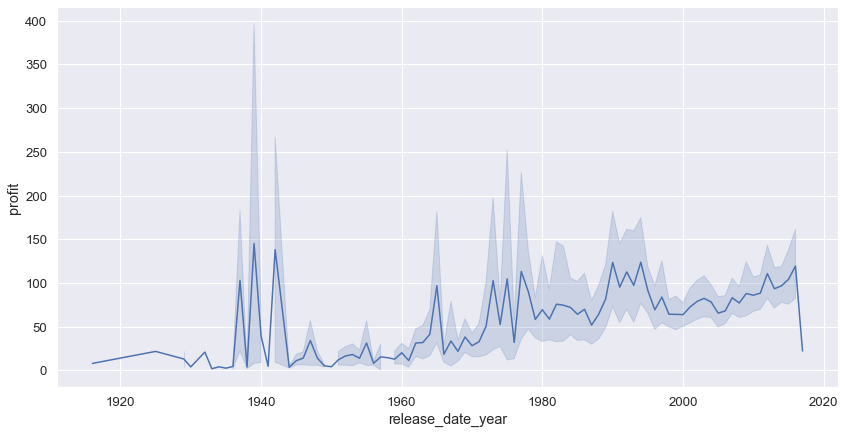

In [160]:
sns.lineplot(data=df,x='release_date_year' , y='profit')

> Over time , runtime increases ? 

<AxesSubplot:xlabel='release_date_year', ylabel='runtime'>

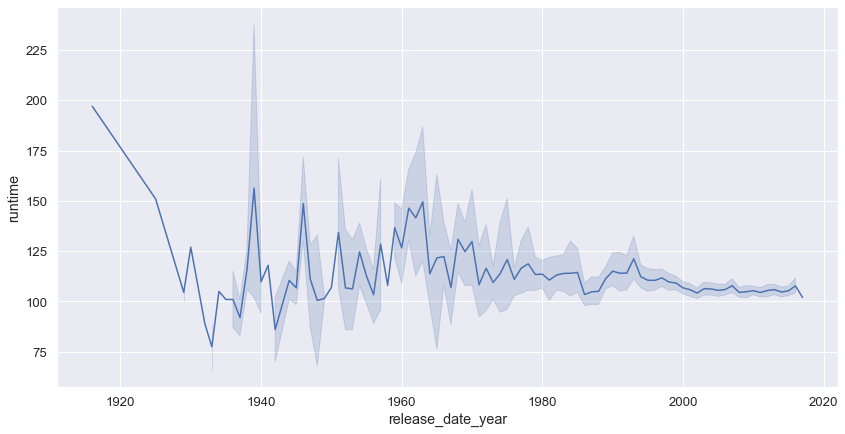

In [161]:
sns.lineplot(data=df,x='release_date_year' , y='runtime')

In [162]:
df[['runtime','release_date_year']]

runtime  release_date_year
0       162.0               2009
1       169.0               2007
2       148.0               2015
3       165.0               2012
4       132.0               2012
5       139.0               2007
6       100.0               2010
7       141.0               2015
8       153.0               2009
9       151.0               2016
10      154.0               2006
11      106.0               2008
12      151.0               2006
14      143.0               2013
15      150.0               2008
16      143.0               2012
17      136.0               2011
18      106.0               2012
19      144.0               2014
20      136.0               2012
21      140.0               2010
22      161.0               2013
23      113.0               2007
24      187.0               2005
25      194.0               1997
26      147.0               2016
27      131.0               2012
28      124.0               2015
29      143.0               2012
30      127.0               2004
31      130.0               2013
32      108.0               2010
33      104.0               2006
34      104.0               2013
35      150.0               2009
36      165.0               2014
37      130.0               2013
38      142.0               2014
39      125.0               2010
40      106.0               2011
41      114.0               2011
42      103.0               2010
43      115.0               2009
44      137.0               2015
45      116.0               2013
46      131.0               2014
47      132.0               2013
48      114.0               2013
49      143.0               2013
50      116.0               2010
51      131.0               2013
52      154.0               2011
53      122.0               2008
54       93.0               2015
55       93.0               2012
56      122.0               2016
57       98.0               2008
58       91.0               2007
59      158.0               2009
60       96.0               2009
61      124.0               2015
62      109.0               2016
63      143.0               2005
64      144.0               2016
65      152.0               2008
66       96.0               2009
67       94.0               2009
68      126.0               2008
69      126.0               2011
70      106.0               1999
71      112.0               2008
72      123.0               2016
74      113.0               2014
75      135.0               1995
76      118.0               2009
77       94.0               2015
78      106.0               2016
79      124.0               2010
80      127.0               2012
81       97.0               2014
82      130.0               2014
83      109.0               2015
85      136.0               2014
86       93.0               2010
87      130.0               2015
88      102.0               2014
89      108.0               2012
90      100.0               2004
91      120.0               2016
92       98.0               2010
93      109.0               2003
94      121.0               2014
95      169.0               2014
96      148.0               2010
97      120.0               2016
98      169.0               2012
99      106.0               2001
100     166.0               2008
101     132.0               2011
102     137.0               2015
103     109.0               2010
104      99.0               2006
105     113.0               2016
106      93.0               2007
107     123.0               2016
108     126.0               2015
109     113.0               2010
110     183.0               2001
111     144.0               2007
112     175.0               2004
113     138.0               2007
114     157.0               2005
115      92.0               2008
116     101.0               2007
117     115.0               2005
118     111.0               2007
119     140.0               2005
120      89.0               2008
121     105.0               2009
122     107.0               2009
123     129.0

> Which month has the highest profit?

<AxesSubplot:xlabel='release_date_month', ylabel='profit'>

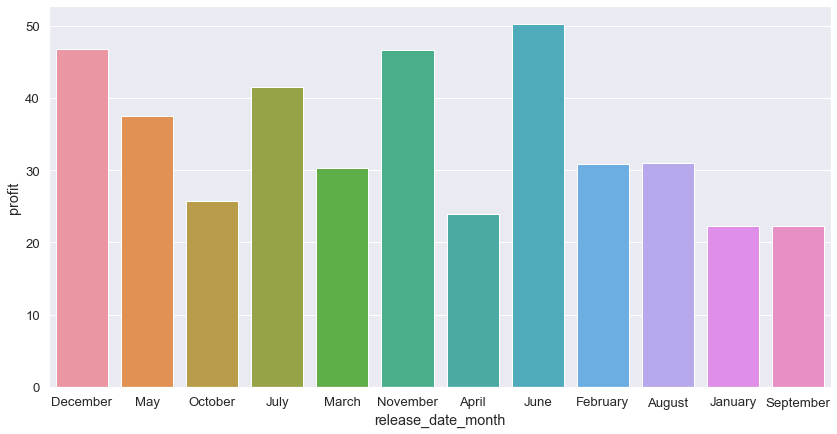

In [163]:
sns.barplot(data = df , x = 'release_date_month' , y='profit',estimator=np.median,ci=None)

> Which day has the highest profit?

<AxesSubplot:xlabel='release_date_day', ylabel='profit'>

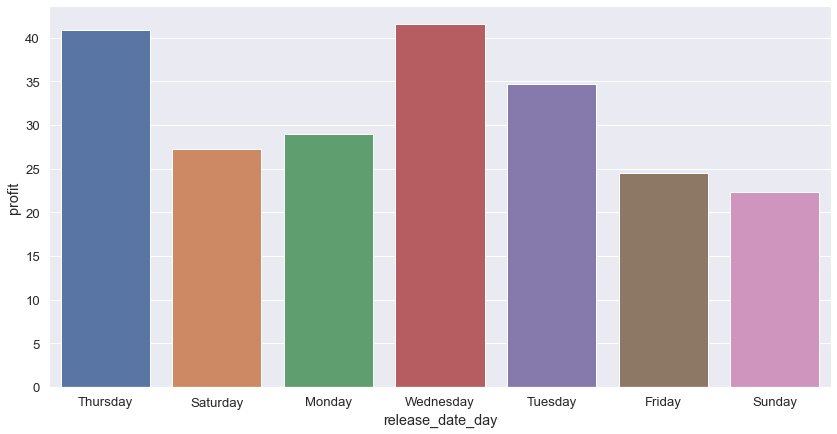

In [164]:
sns.barplot(data = df , x = 'release_date_day' , y='profit',estimator=np.median,ci=None)

> Which runtime_category has the highest profit?

<AxesSubplot:xlabel='runtime_category', ylabel='profit'>

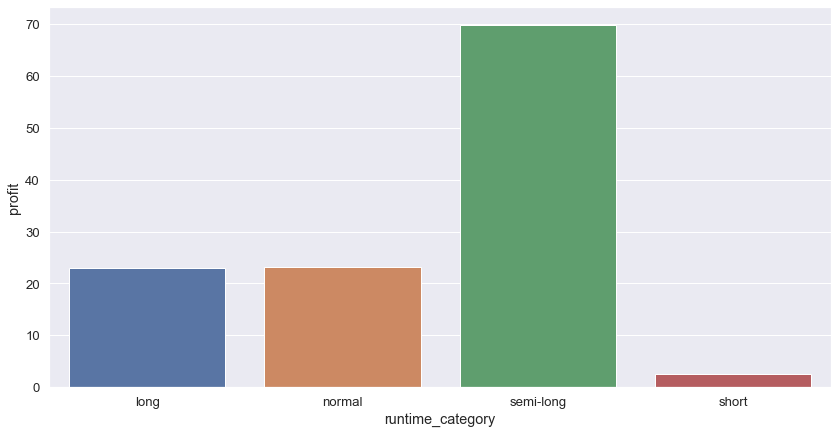

In [165]:
sns.barplot(data = df , x = 'runtime_category' , y='profit',estimator=np.median,ci=None)

> with the increase in runtime the profit increases

<AxesSubplot:xlabel='runtime', ylabel='profit'>

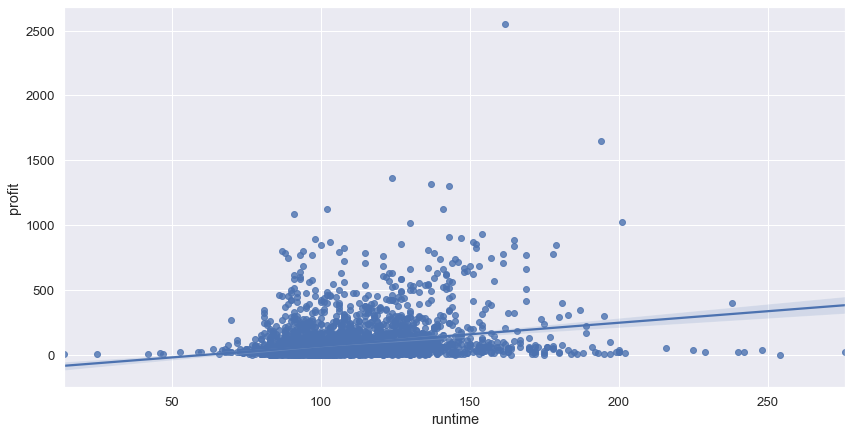

In [166]:
sns.regplot(data=df, x='runtime',y='profit')

In [167]:
df[['profit','runtime']].corr()

profit   runtime
profit   1.000000  0.260487
runtime  0.260487  1.000000

> When the number of production companies increases, does the budget increase?

<AxesSubplot:xlabel='production_companies_count', ylabel='budget'>

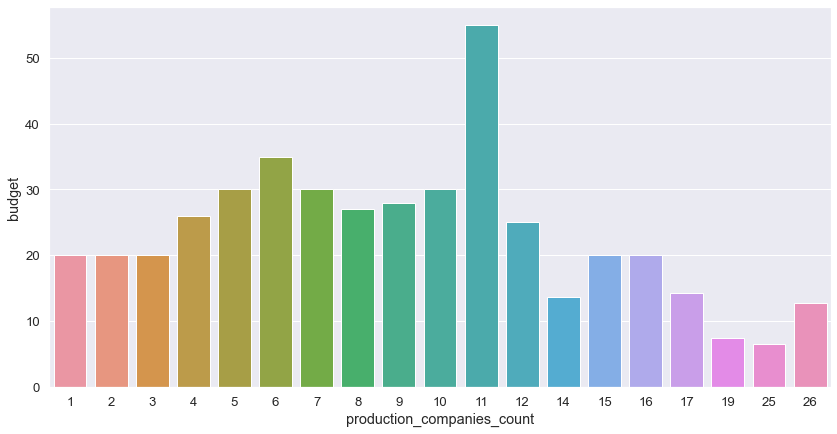

In [168]:
sns.barplot(x=df['production_companies_count'].astype('category'),y=df['budget'],estimator=np.median,ci=None)

> When the number of production companies increases, does the profit increase?

<AxesSubplot:xlabel='production_companies_count', ylabel='profit'>

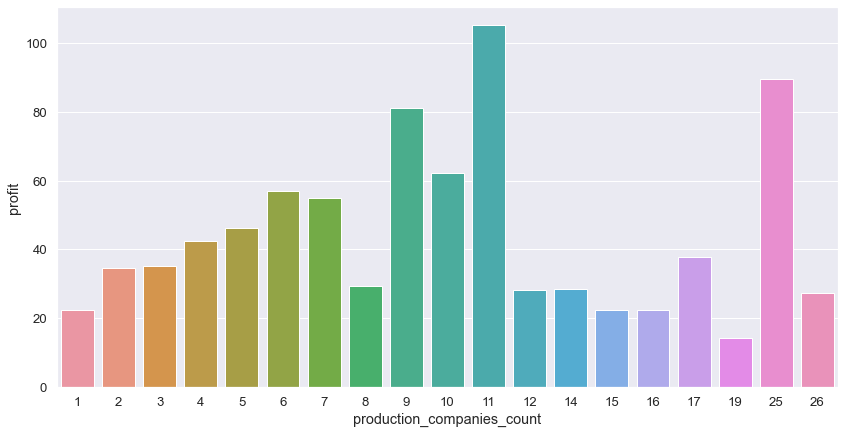

In [169]:
sns.barplot(x=df['production_companies_count'].astype('category'),y=df['profit'],estimator=np.median,ci=None)

<AxesSubplot:xlabel='production_companies_count', ylabel='profit'>

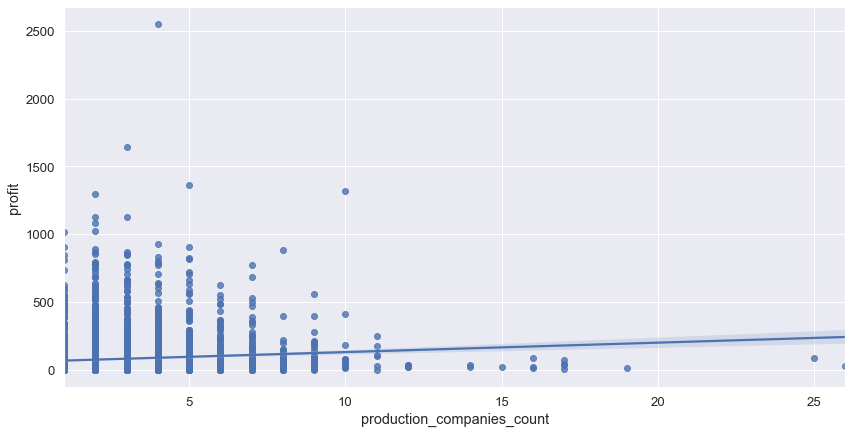

In [170]:
sns.regplot(data=df,x='production_companies_count',y='profit')

> When the number of production_countries_count increases, does the budget increase?

<AxesSubplot:xlabel='production_countries_count', ylabel='budget'>

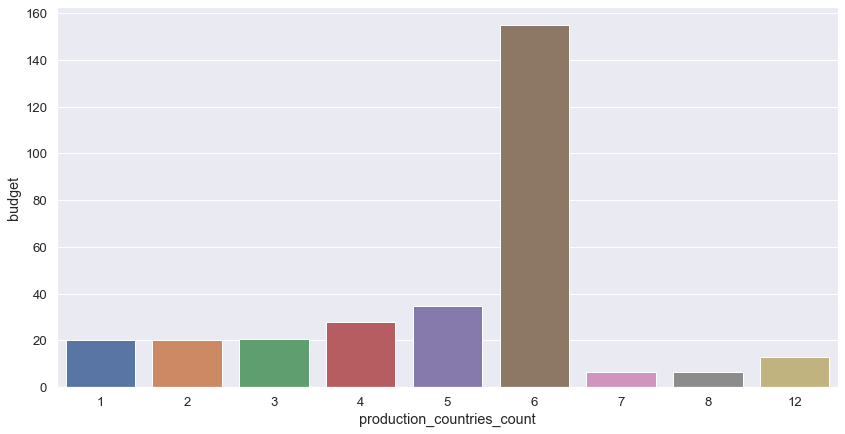

In [171]:
sns.barplot(x=df['production_countries_count'].astype('category'),y=df['budget'],estimator=np.median,ci=None)

> When the number of production_countries_count increases, does the profit increase?

<AxesSubplot:xlabel='production_countries_count', ylabel='profit'>

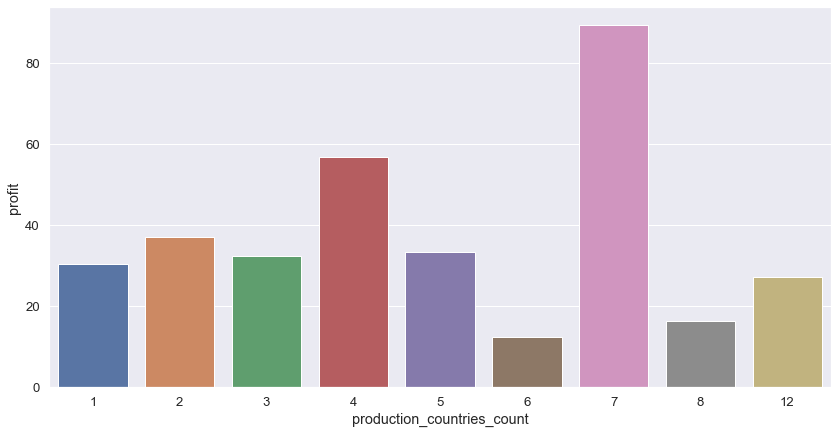

In [172]:
sns.barplot(x=df['production_countries_count'].astype('category'),y=df['profit'],estimator=np.median,ci=None)

> When the number of production_countries_count increases, does the budget increase?

<AxesSubplot:xlabel='production_countries_count', ylabel='budget'>

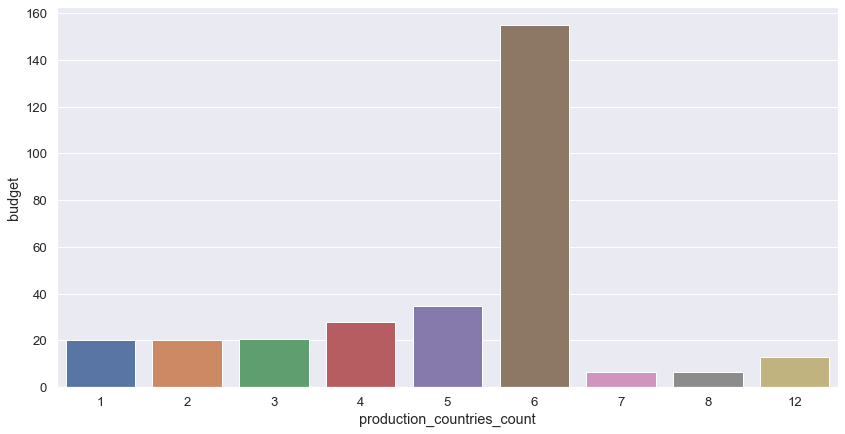

In [173]:
sns.barplot(x=df['production_countries_count'].astype('category'),y=df['budget'],estimator=np.median,ci=None)

>When the number of cast_total_number increases, does the budget increase?

<AxesSubplot:xlabel='cast_total_number', ylabel='budget'>

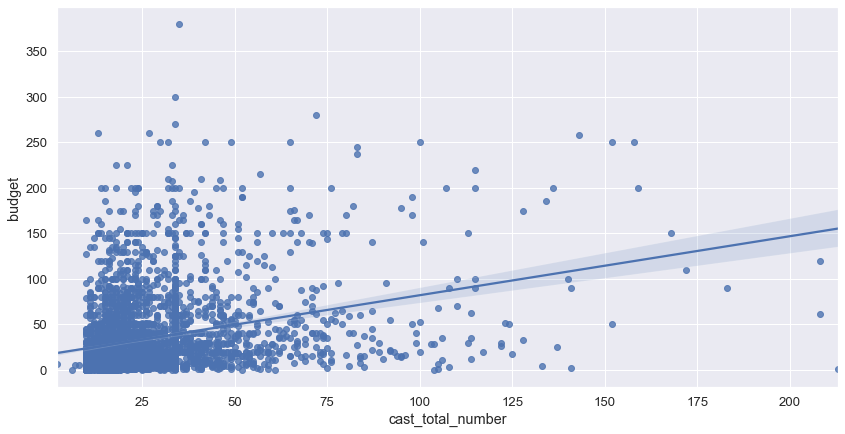

In [174]:
sns.regplot(x=df['cast_total_number'],y=df['budget'])

> When the number of crew_total_number increases, does the budget increase?

<AxesSubplot:xlabel='crew_total_number', ylabel='budget'>

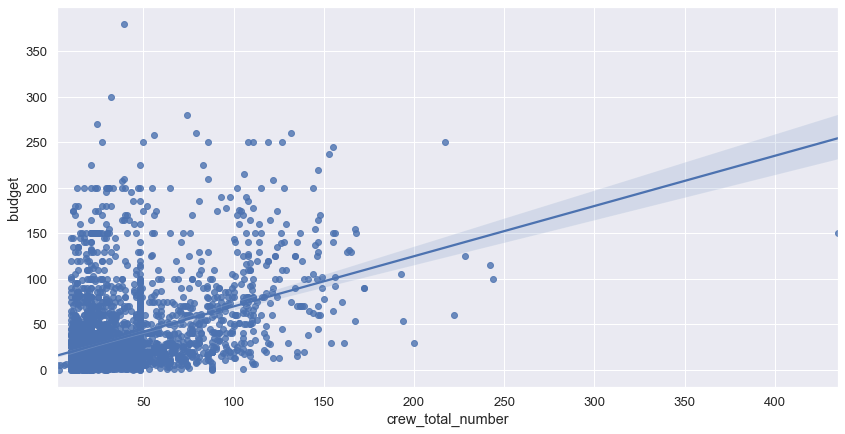

In [175]:
sns.regplot(x=df['crew_total_number'],y=df['budget'])

> When the number of budget increases, does the profit increase?

<AxesSubplot:xlabel='budget', ylabel='profit'>

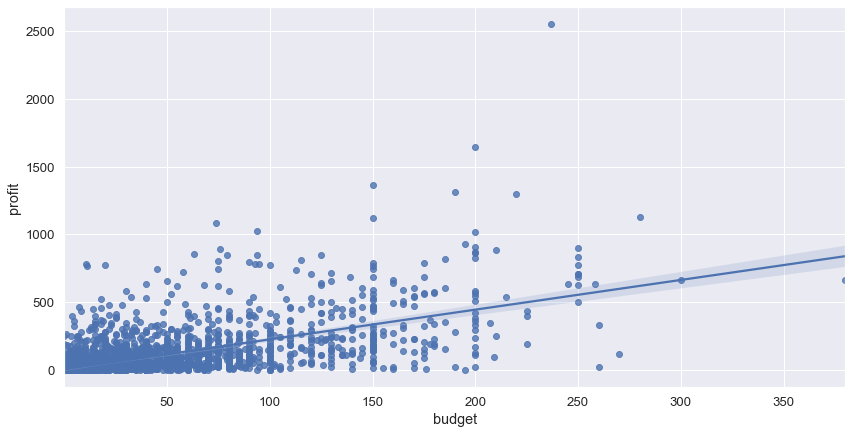

In [176]:
sns.regplot(x=df['budget'],y=df['profit'])

> with the increase in title the profit increases

<AxesSubplot:xlabel='title_length', ylabel='profit'>

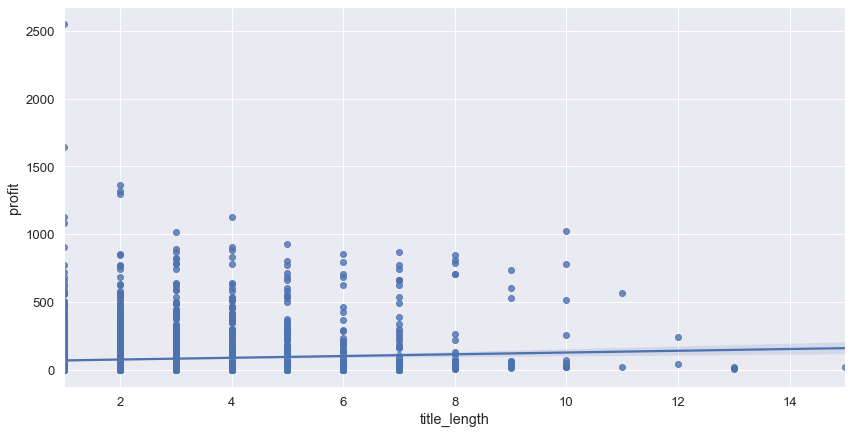

In [177]:
sns.regplot(x=df['title_length'],y=df['profit'])

<AxesSubplot:xlabel='title_length', ylabel='budget'>

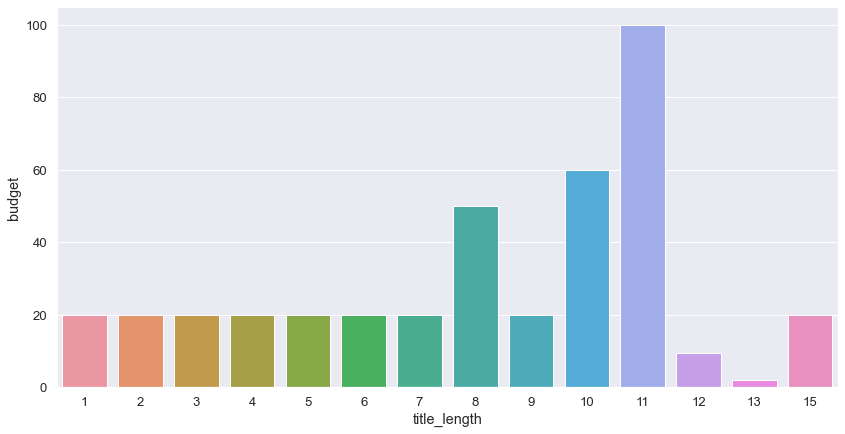

In [178]:
sns.barplot(x=df['title_length'].astype('category'),y=df['budget'],estimator=np.median,ci=None)

> over time , title_length increases

<AxesSubplot:xlabel='release_date_year', ylabel='title_length'>

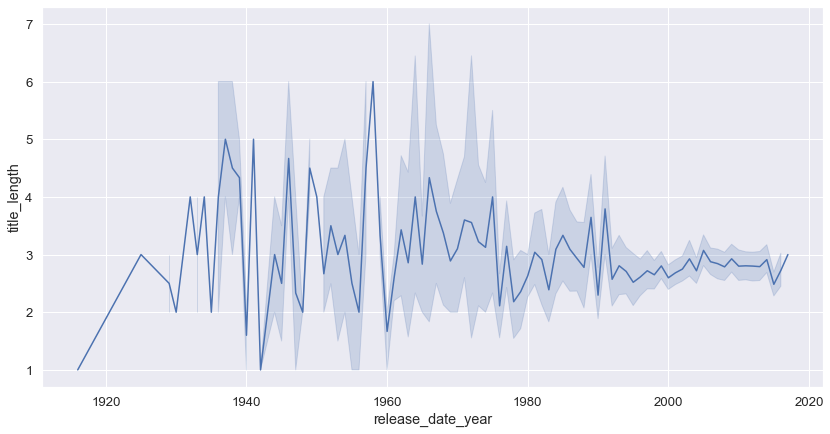

In [179]:
sns.lineplot(data=df,x='release_date_year' , y='title_length')

> with the increase in overview_length the profit increases

<AxesSubplot:xlabel='overview_length', ylabel='profit'>

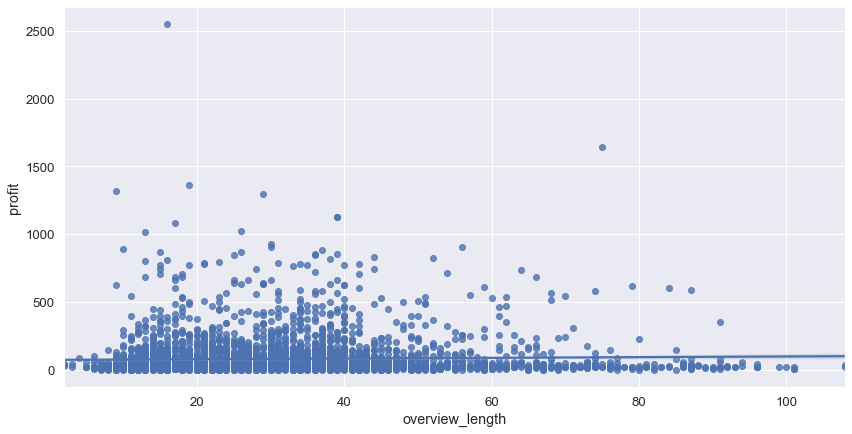

In [180]:
sns.regplot(x=df['overview_length'],y=df['profit'])

<AxesSubplot:xlabel='overview_length', ylabel='budget'>

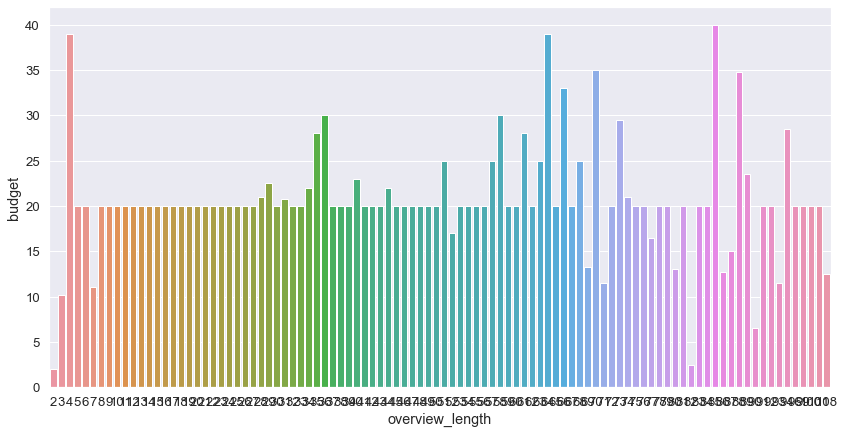

In [181]:
sns.barplot(x=df['overview_length'].astype('category'),y=df['budget'],estimator=np.median,ci=None)

> over time , overview_length increases

<AxesSubplot:xlabel='release_date_year', ylabel='overview_length'>

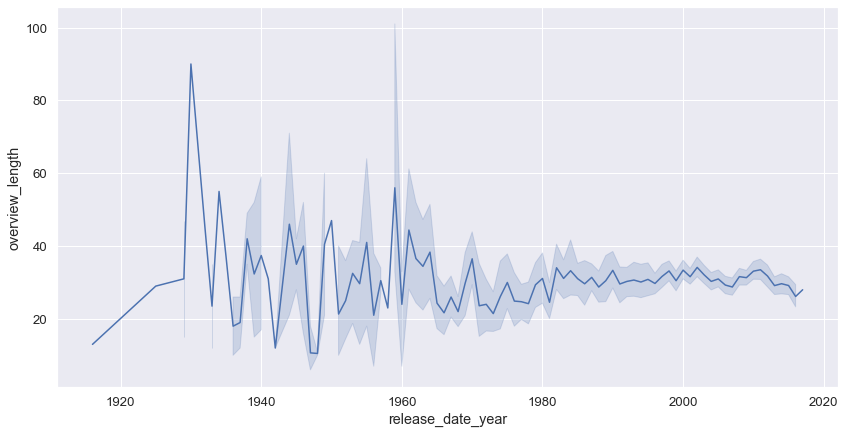

In [182]:
sns.lineplot(data=df,x='release_date_year' , y='overview_length')

> with the increase in keywords the profit increases

<AxesSubplot:xlabel='keywords_count', ylabel='profit'>

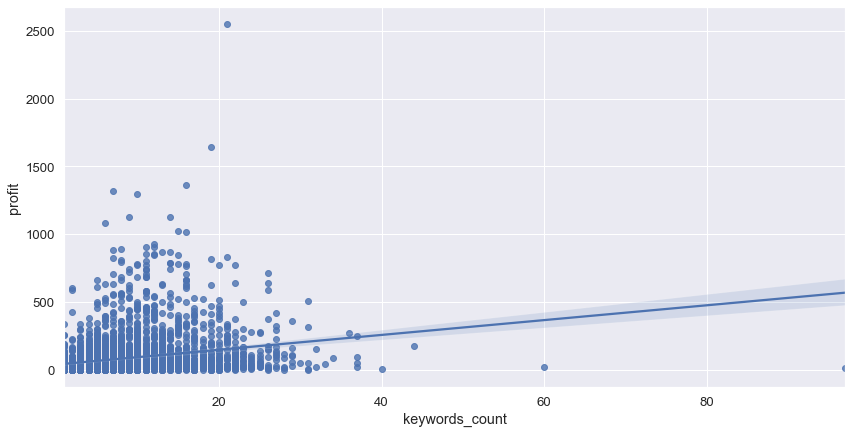

In [183]:
sns.regplot(x=df['keywords_count'],y=df['profit'])

<AxesSubplot:xlabel='keywords_count', ylabel='budget'>

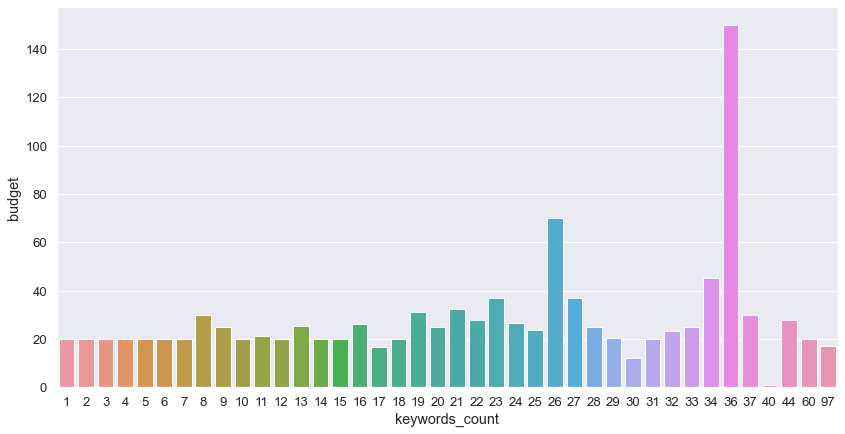

In [184]:
sns.barplot(x=df['keywords_count'].astype('category'),y=df['budget'],estimator=np.median,ci=None)

> over time , keywords_count increases

<AxesSubplot:xlabel='release_date_year', ylabel='keywords_count'>

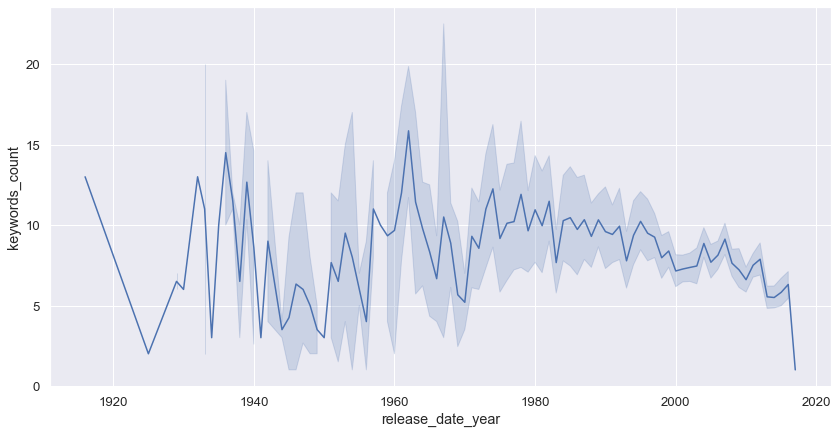

In [185]:
sns.lineplot(data=df,x='release_date_year' , y='keywords_count')

> When the number of genres_count increases, does the budget increase?

<AxesSubplot:xlabel='genres_count', ylabel='budget'>

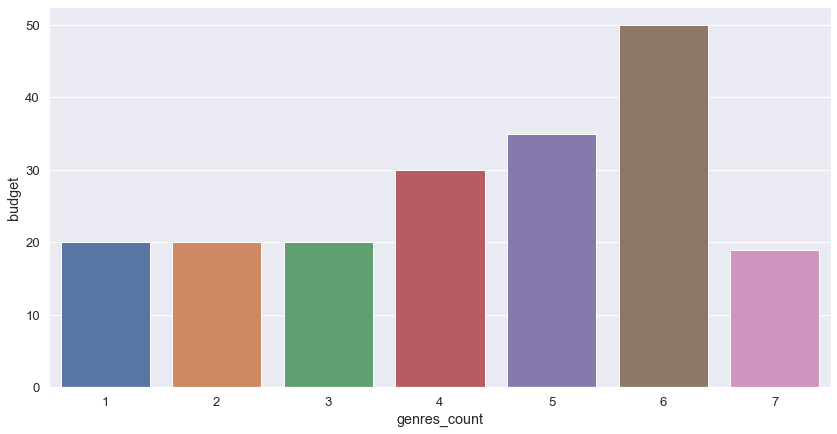

In [186]:
sns.barplot(x=df['genres_count'].astype('category'),y=df['budget'],estimator=np.median,ci=None)

> When the number of genres_count increases, does the profit increase?

<AxesSubplot:xlabel='genres_count', ylabel='profit'>

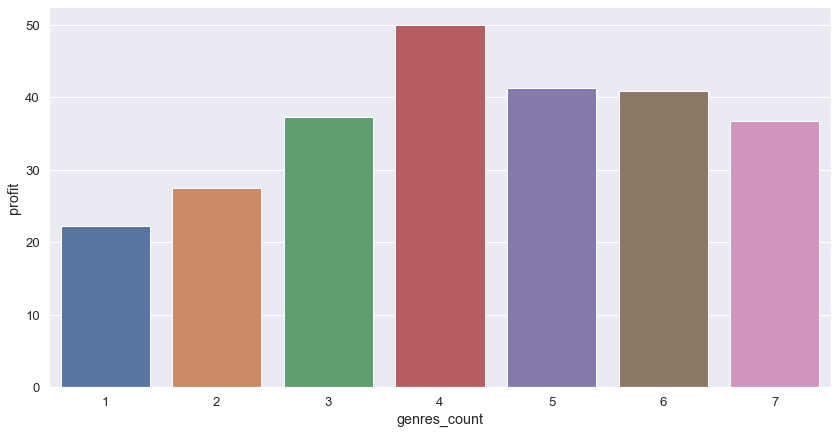

In [187]:
sns.barplot(x=df['genres_count'].astype('category'),y=df['profit'],estimator=np.median,ci=None)

> over time , genres_count increases

<AxesSubplot:xlabel='release_date_year', ylabel='genres_count'>

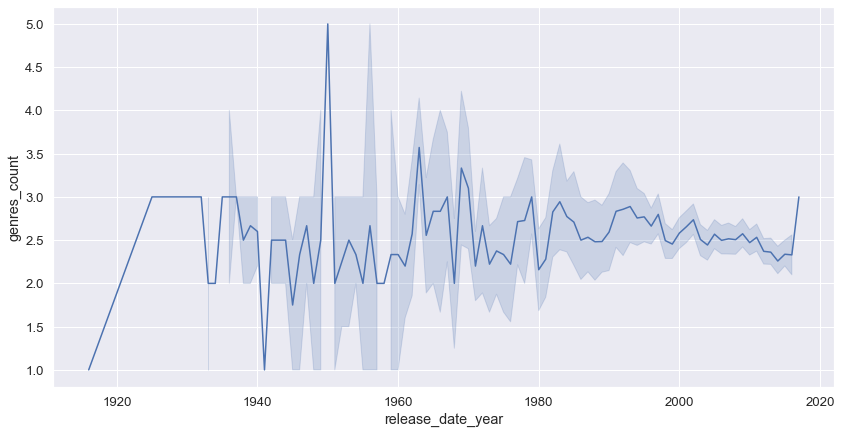

In [188]:
sns.lineplot(data=df,x='release_date_year' , y='genres_count')

> which original_language has the highest profit?

<AxesSubplot:xlabel='original_language', ylabel='profit'>

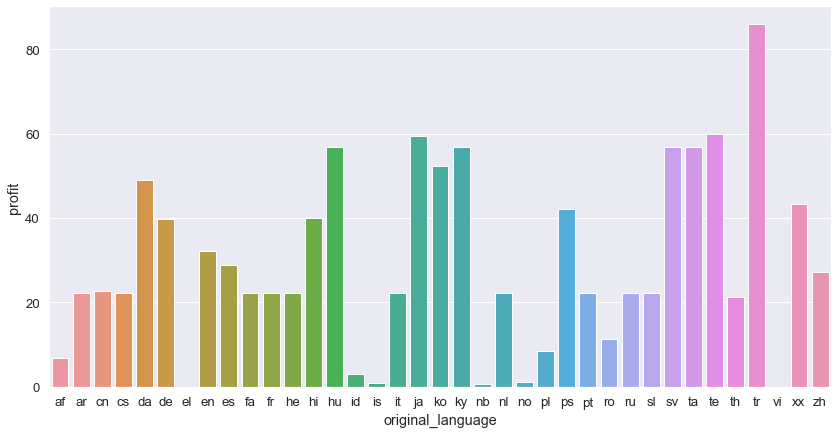

In [189]:
sns.barplot(x=df['original_language'],y=df['profit'],estimator=np.median,ci=None)

> which original_language has the highest budget ?

<AxesSubplot:xlabel='original_language', ylabel='budget'>

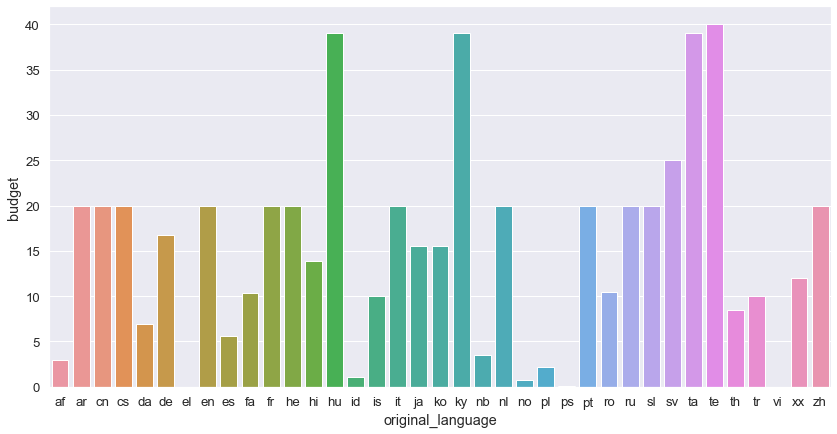

In [190]:
sns.barplot(x=df['original_language'],y=df['budget'],estimator=np.median,ci=None)

> which original_language has the highest runtime ?

<AxesSubplot:xlabel='original_language', ylabel='runtime'>

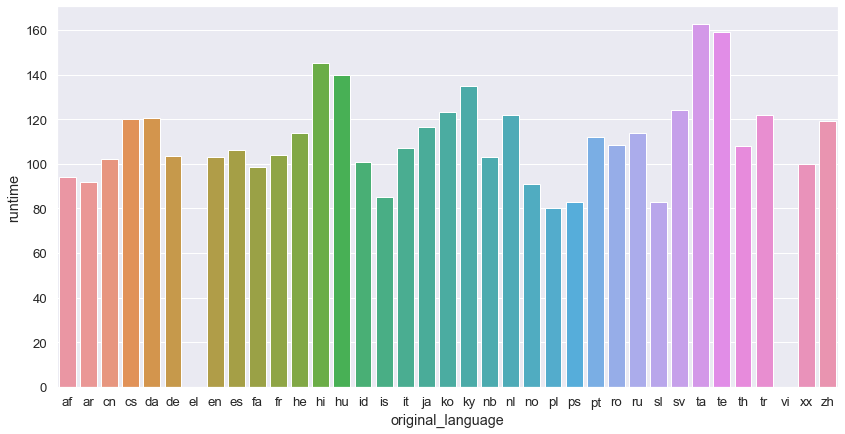

In [191]:
sns.barplot(x=df['original_language'],y=df['runtime'],estimator=np.median,ci=None)

> which spoken_languages has the highest profit ?

<AxesSubplot:xlabel='spoken_languages_count', ylabel='profit'>

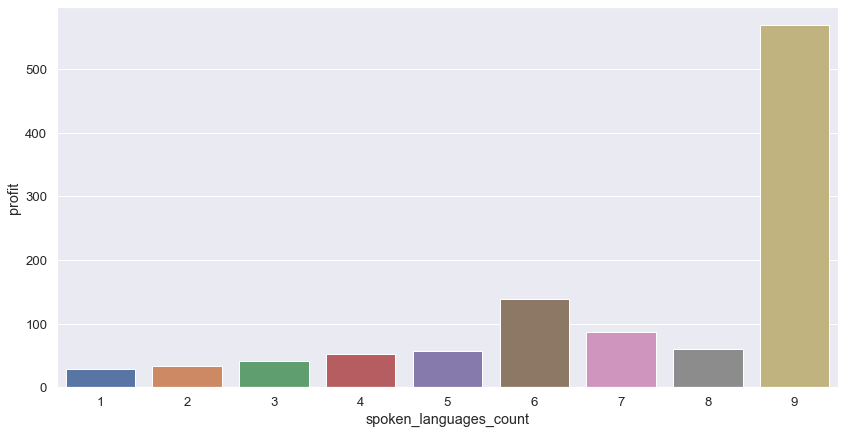

In [192]:
sns.barplot(x=df['spoken_languages_count'].astype('category'),y=df['profit'],estimator=np.median,ci=None)

> which spoken_languages has the highest budget ?

<AxesSubplot:xlabel='spoken_languages_count', ylabel='budget'>

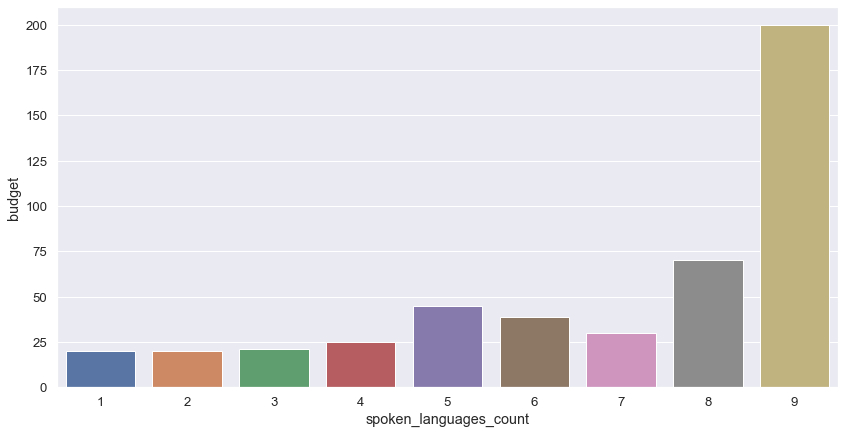

In [193]:
sns.barplot(x=df['spoken_languages_count'],y=df['budget'],estimator=np.median,ci=None)

> which original_language has the highest runtime ?

<AxesSubplot:xlabel='spoken_languages_count', ylabel='runtime'>

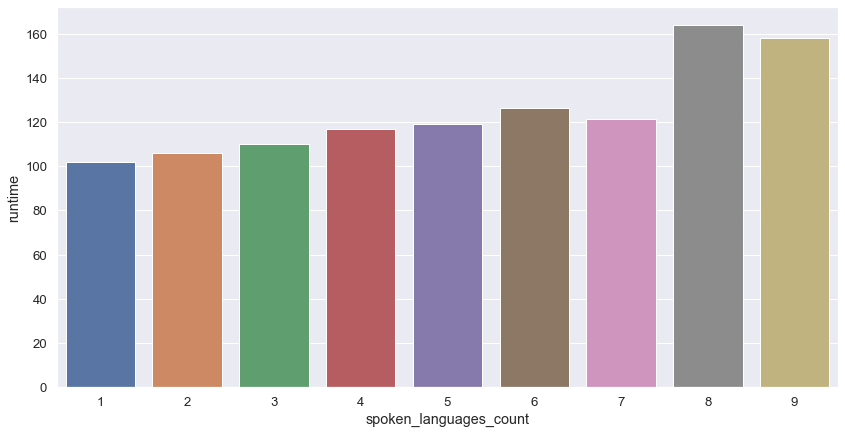

In [194]:
sns.barplot(x=df['spoken_languages_count'],y=df['runtime'],estimator=np.median,ci=None)

<AxesSubplot:xlabel='spoken_languages_count', ylabel='runtime'>

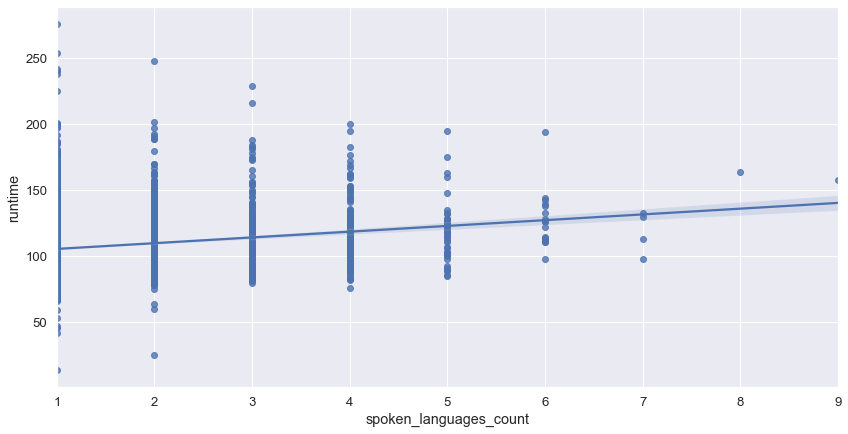

In [195]:
sns.regplot(data=df , x='spoken_languages_count' , y='runtime')

> over time , spoken_languages increases

<AxesSubplot:xlabel='release_date_year', ylabel='spoken_languages_count'>

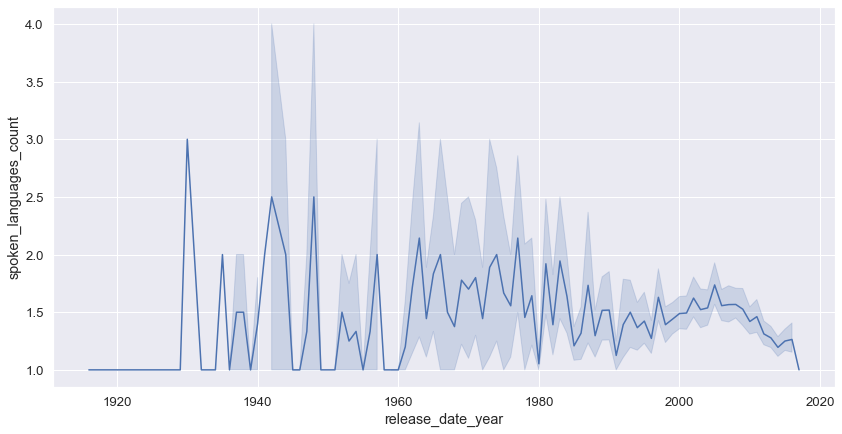

In [196]:
sns.lineplot(data=df,x='release_date_year' , y='spoken_languages_count')

> Does the budget increase the imdb_rate increase?

<AxesSubplot:xlabel='imdb_rate', ylabel='budget'>

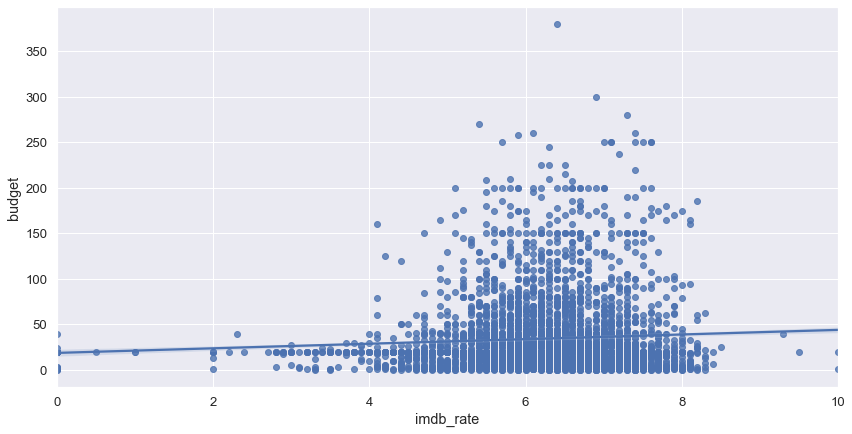

In [197]:
sns.regplot(x=df['imdb_rate'],y=df['budget'])

> Does the profit increase the imdb_rate increase?

<AxesSubplot:xlabel='imdb_rate', ylabel='profit'>

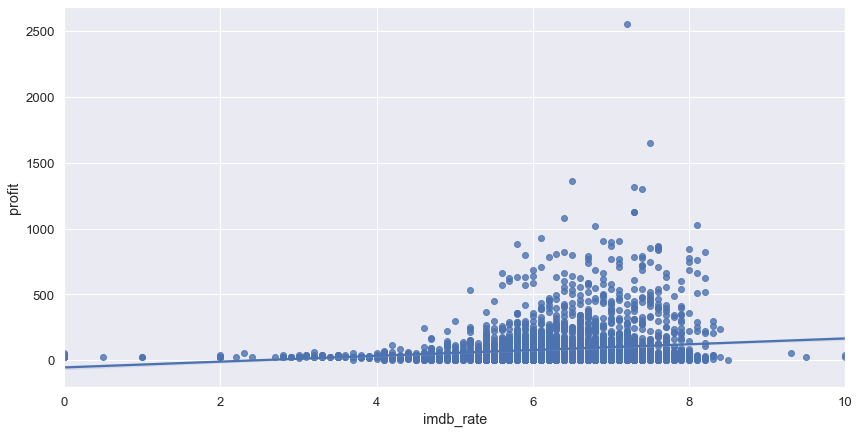

In [198]:
sns.regplot(x=df['imdb_rate'],y=df['profit'])

> When the budget increases, does the popularity increase?

<AxesSubplot:xlabel='popularity', ylabel='budget'>

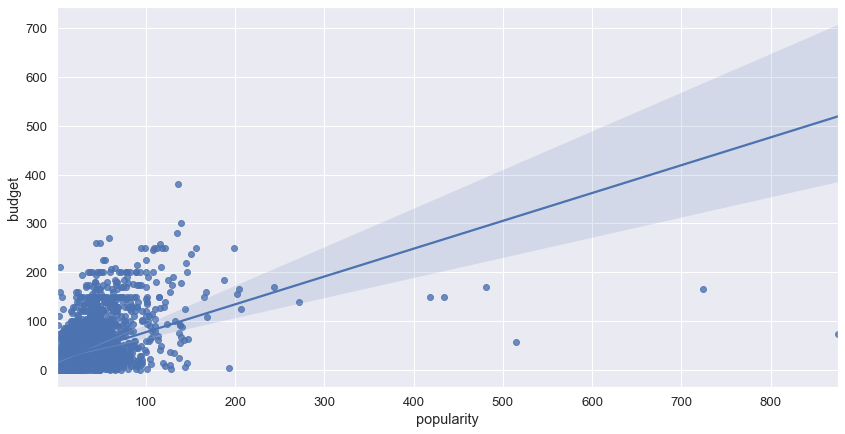

In [199]:
sns.regplot(x=df['popularity'],y=df['budget'])

> When the popularity increases, does the profit increase?

<AxesSubplot:xlabel='popularity', ylabel='profit'>

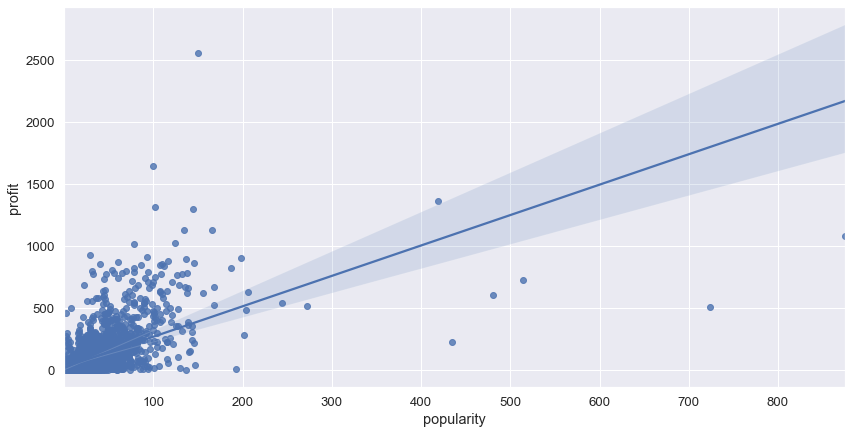

In [200]:
sns.regplot(x=df['popularity'],y=df['profit'])

> When the budget increases, does the imdb_users_vote_count increase?

<AxesSubplot:xlabel='imdb_users_vote_count', ylabel='budget'>

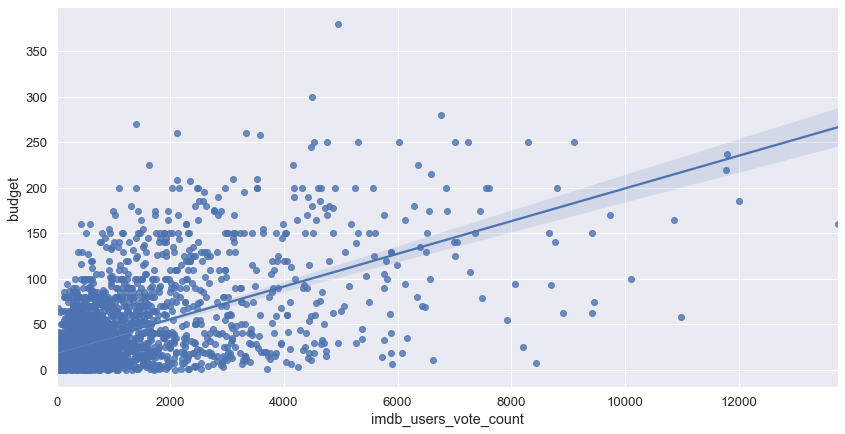

In [201]:
sns.regplot(x=df['imdb_users_vote_count'],y=df['budget'])

> When the imdb_users_vote_count increases, does the profit increase?

<AxesSubplot:xlabel='imdb_users_vote_count', ylabel='profit'>

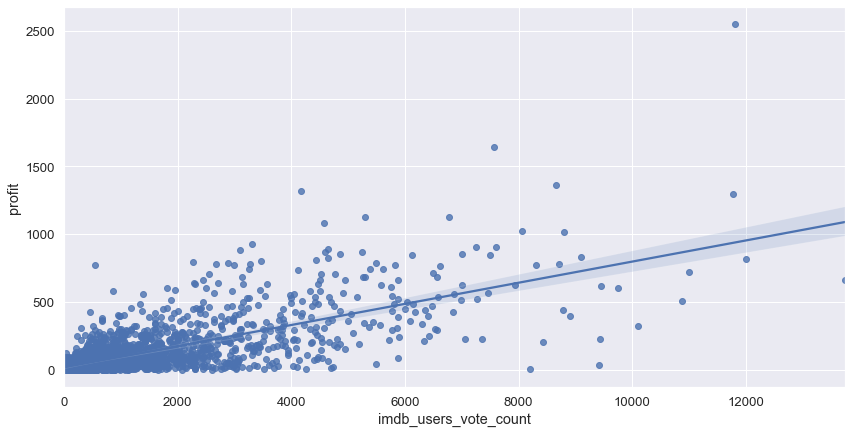

In [202]:
sns.regplot(x=df['imdb_users_vote_count'],y=df['profit'])

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3865 entries, 0 to 4802
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   budget                      3865 non-null   float64 
 1   genres                      3865 non-null   object  
 2   keywords                    3865 non-null   object  
 3   original_language           3865 non-null   category
 4   popularity                  3865 non-null   float64 
 5   production_companies        3865 non-null   object  
 6   production_countries        3865 non-null   object  
 7   runtime                     3865 non-null   float64 
 8   spoken_languages            3865 non-null   object  
 9   imdb_rate                   3865 non-null   float64 
 10  imdb_users_vote_count       3865 non-null   int64   
 11  overview_length             3865 non-null   int64   
 12  title_length                3865 non-null   int64   
 13  runtime_category  

In [204]:
#df.select_dtypes(exclude=['object','category']).corr()

<AxesSubplot:>

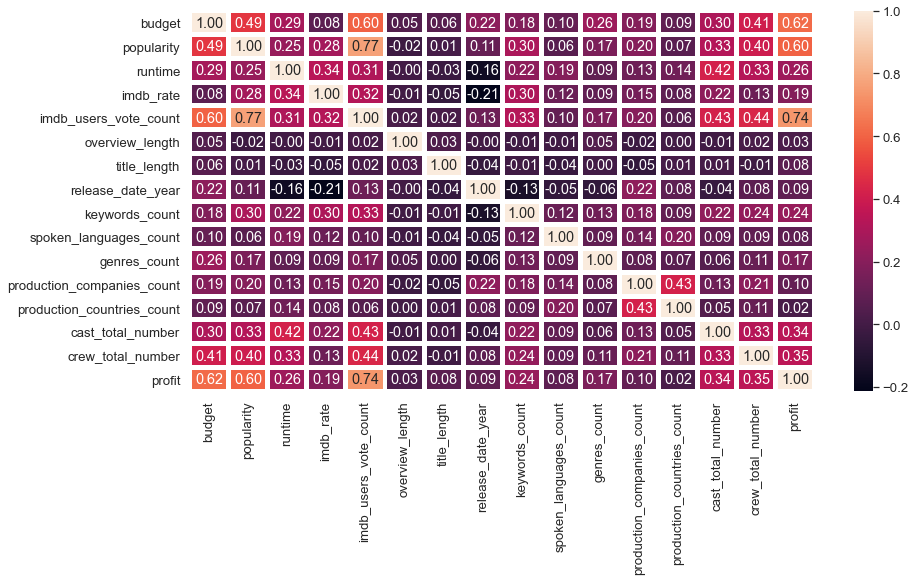

In [207]:
sns.heatmap(df.select_dtypes(exclude=['object','category']).corr(),annot=True,linewidths=4, fmt='.2f')